# Modelos Escolhidos

| Model             | Model Size | Context Window (tokens) | Attention | Activation | Layer Norm |
| ----------------- | ---------- | ----------------------- | --------- | ---------- | ---------- |
| Cogito 70B        | 70B        | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Cogito 8B         | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 70B   | 70B        | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 8B    | 8B         | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| Falcon3 10B       | 10B        | 32000                   | GQA       | ReLU       | LayerNorm  |
| Falcon3 7B        | 7B         | 32000                   | GQA       | ReLU       | LayerNorm  |
| Foundation-Sec 8B | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Gemma 3 27B       | 27B        | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Gemma 3 9B        | 9B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| GPT-OSS 20B       | 20B        | 131072                  | MoE       | SwiGLU     | RMSNorm    |
| Granite3.2 8B     | 8B         | 131072                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.1 70B     | 70B        | 128000                  | GQA       | SwiGLU     | RMSNorm    |
| Llama 3.1 8B      | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.3 70B     | 70B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Mistral 7B        | 7B         | 32768                   | GQA, SWA  | SwiGLU     | RMSNorm    |
| Mistral Small 24B | 24B        | 32768                   | GQA       | SwiGLU     | RMSNorm    |
| Phi-3 Medium 14B  | 14B        | 128000                  | MHA       | GeGLU      | RMSNorm    |
| Phi-3 Small 7B    | 7B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Phi-4 14B         | 14B        | 16000                   | MHA       | GeGLU      | RMSNorm    |
| Qwen2.5 32B       | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen2.5 7B        | 7B         | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 32B         | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 8B          | 8B         | 262144                  | GQA       | SwiGLU     | RMSNorm    |
| SmolLM2 1.7B      | 1.7B       | 8192                    | MHA       | SwiGLU     | RMSNorm    |
| TinyLlama 1.1B    | 1.1B       | 2048                    | GQA       | SwiGLU     | RMSNorm    |


# Análise experimento  Final parte 1

In [61]:
# Carregar todos os arquivos zeroshot da raiz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Carregar arquivo de categorias reais
df_real = pd.read_excel("data/24_incidentes.xlsx")

# Buscar todos os arquivos zeroshot
zeroshot_files = sorted(glob.glob("experimentos/parte_1_experimentos/final/resultados_ollama_*.xlsx"))

print(f"Total de arquivos: {len(zeroshot_files)}")
print(f"Categorias reais disponíveis: {len(df_real)} incidentes")

Total de arquivos: 126
Categorias reais disponíveis: 24 incidentes


In [62]:
arquivos_dict = {
    "nome_arquivo": [],
    "colunas": [],
    "modelo": [],
    "parametros": [],
    "Tecnica": []
}

for i in range(len(zeroshot_files)):
    
    model_tecnica = zeroshot_files[i].split('/')[-1].replace('.xlsx','').replace('resultados_ollama_','')

    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica)
    match_parametro = re.search(r'[\d]+b', model_tecnica)
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica)

    # Leitura robusta do Excel
    try:
        colunas = list(pd.read_excel(zeroshot_files[i], engine='openpyxl').columns)
    except:
        try:
            colunas = list(pd.read_excel(zeroshot_files[i], engine='xlrd').columns)
        except:
            colunas = []  # Lista vazia em caso de erro
    
    arquivos_dict["nome_arquivo"].append(zeroshot_files[i])
    arquivos_dict["colunas"].append(colunas)
    arquivos_dict["modelo"].append(match_modelo.group() if match_modelo else 'não encontrado')
    arquivos_dict["parametros"].append(match_parametro.group() if match_parametro else 'não encontrado')
    arquivos_dict["Tecnica"].append(match_tecnica.group() if match_tecnica else 'não encontrado')

In [63]:
df3 = pd.DataFrame(arquivos_dict)

In [64]:
df3.head()

nome_arquivo  \
0  experimentos/parte_1_experimentos/final/result...   
1  experimentos/parte_1_experimentos/final/result...   
2  experimentos/parte_1_experimentos/final/result...   
3  experimentos/parte_1_experimentos/final/result...   
4  experimentos/parte_1_experimentos/final/result...   

                                             colunas      modelo parametros  \
0  [id, informacoes_das_colunas, categoria, expli...  cogito_70b        70b   
1  [id, informacoes_das_colunas, categoria, expli...  cogito_70b        70b   
2  [id, informacoes_das_colunas, categoria, expli...  cogito_70b        70b   
3   [Response, Processed, Category, Explanation, id]  cogito_70b        70b   
4  [id, informacoes_das_colunas, categoria, expli...   cogito_8b         8b   

                     Tecnica  
0           progressive_hint  
1  progressive_rectification  
2                  self_hint  
3                   zeroshot  
4         hypothesis_testing

In [73]:
df3.groupby(['modelo','Tecnica']).agg('count').reset_index()

modelo                    Tecnica  nome_arquivo  colunas  \
0        cogito_70b           progressive_hint             1        1   
1        cogito_70b  progressive_rectification             1        1   
2        cogito_70b                  self_hint             1        1   
3        cogito_70b                   zeroshot             1        1   
4         cogito_8b         hypothesis_testing             1        1   
..              ...                        ...           ...      ...   
121  tinyllama_1_1b         hypothesis_testing             1        1   
122  tinyllama_1_1b           progressive_hint             1        1   
123  tinyllama_1_1b  progressive_rectification             1        1   
124  tinyllama_1_1b                  self_hint             1        1   
125  tinyllama_1_1b                   zeroshot             1        1   

     parametros  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
121           1  
122           1  
123           1  
124           1  
125           1  

[126 rows x 5 columns]

In [74]:
df_agg = df3.groupby(['modelo','Tecnica']).size().reset_index(name='contagem')
df_agg.pivot(index='modelo', columns='Tecnica', values='contagem').reset_index()

Tecnica             modelo  hypothesis_testing  progressive_hint  \
0               cogito_70b                 NaN               1.0   
1                cogito_8b                 1.0               1.0   
2          deepseek_r1_70b                 NaN               1.0   
3           deepseek_r1_8b                 1.0               1.0   
4              falcon3_10b                 1.0               1.0   
5               falcon3_7b                 1.0               1.0   
6        foundation_sec_8b                 1.0               1.0   
7               gemma2_27b                 NaN               1.0   
8                gemma2_9b                 1.0               1.0   
9               gemma3_12b                 1.0               1.0   
10              gemma3_27b                 1.0               1.0   
11             gpt_oss_20b                 1.0               1.0   
12           granite3_2_8b                 1.0               1.0   
13             llama3_1_8b                 1.0               1.0   
14            llama3_3_70b                 1.0               1.0   
15              mistral_7b                 1.0               1.0   
16       mistral_small_24b                 1.0               1.0   
17         phi3_medium_14b                 1.0               1.0   
18           phi3_small_7b                 1.0               1.0   
19                phi4_14b                 1.0               1.0   
20             qwen2_5_32b                 1.0               1.0   
21              qwen2_5_7b                 1.0               1.0   
22               qwen3_32b                 1.0               1.0   
23                qwen3_8b                 1.0               1.0   
24            smollm2_1_7b                 1.0               1.0   
25          tinyllama_1_1b                 1.0               1.0   

Tecnica  progressive_rectification  self_hint  zeroshot  
0                              1.0        1.0       1.0  
1                              1.0        1.0       1.0  
2                              NaN        1.0       1.0  
3                              1.0        1.0       1.0  
4                              1.0        1.0       1.0  
5                              1.0        1.0       1.0  
6                              1.0        1.0       1.0  
7                              1.0        1.0       1.0  
8                              1.0        1.0       1.0  
9                              1.0        1.0       1.0  
10                             1.0        1.0       1.0  
11                             1.0        1.0       1.0  
12                             1.0        1.0       1.0  
13                             1.0        1.0       1.0  
14                             1.0        1.0       1.0  
15                             1.0        1.0       1.0  
16                             1.0        1.0       1.0  
17                             1.0        1.0       1.0  
18                             1.0        1.0       1.0  
19                             1.0        1.0       1.0  
20                             1.0        1.0       1.0  
21                             1.0        1.0       1.0  
22                             1.0        1.0       1.0  
23                             1.0        1.0       1.0  
24                             1.0        1.0       1.0  
25                             1.0        1.0       1.0

In [66]:
len(df3["modelo"].unique())

26

In [75]:
df_final = pd.DataFrame()
for x in zeroshot_files:
    try:
        df_aux = pd.read_excel(x)
    except:
        print(x)
        continue
    model_tecnica = x.split("/")[-1].replace("resultados_ollama_","").replace(".xlsx","")
    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica).group()
    match_parametro = re.search(r'[\d]+b', model_tecnica).group()
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica).group()
    
    df_aux['modelo'] = match_modelo
    df_aux['parametro'] = match_parametro
    df_aux['tecnica'] = match_tecnica
    
    if "Category" in list(df_aux.columns):
        df_aux = df_aux.rename(columns={"Category":"categoria","Explanation":"explicacao"})

    df_final = pd.concat([df_final, df_aux])
    
colunas_final = ["id","categoria","explicacao","modelo","parametro","tecnica"]
df_final = df_final[colunas_final]
df_final.rename(columns={"categoria":"categoria_predita","explicacao":"explicacao_predita"}, inplace=True)
df_final = df_final.merge(df_real[['id', 'target','categoria']], on='id', how='left')
df_final['acertou'] = np.where(df_final['categoria_predita'].astype(str).str.lower() == df_final['categoria'].astype(str).str.lower(), 1, 0)
df_final['acertou'] = df_final['acertou'].astype(int)
df_final.head()

experimentos/parte_1_experimentos/final/resultados_ollama_phi3_small_7b_hypothesis_testing.xlsx
experimentos/parte_1_experimentos/final/resultados_ollama_phi3_small_7b_progressive_hint.xlsx
experimentos/parte_1_experimentos/final/resultados_ollama_phi3_small_7b_progressive_rectification.xlsx
experimentos/parte_1_experimentos/final/resultados_ollama_phi3_small_7b_self_hint.xlsx
experimentos/parte_1_experimentos/final/resultados_ollama_phi3_small_7b_zeroshot.xlsx


id categoria_predita  \
0  RNP2022-125941             CAT12   
1  RNP2022-026802             CAT12   
2  RNP2022-042745             CAT12   
3  RNP2022-026209             CAT12   
4  RNP2023-049266              CAT2   

                                  explicacao_predita      modelo parametro  \
0  This incident represents an intrusion attempt ...  cogito_70b       70b   
1  This incident represents an intrusion attempt ...  cogito_70b       70b   
2  This incident represents an intrusion attempt ...  cogito_70b       70b   
3  This incident represents an intrusion attempt ...  cogito_70b       70b   
4  The incident clearly describes a malware infec...  cogito_70b       70b   

            tecnica                                             target  \
0  progressive_hint  [DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...   
1  progressive_hint  [DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...   
2  progressive_hint  [DATE_TIME_03857e5518] 08:03 CERT.br: \nData d...   
3  progressive_hint  [DATE_TIME_2ac98305e7] 08:39 CERT.br: \nData d...   
4  progressive_hint  [DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...   

  categoria  acertou  
0     CAT12        1  
1     CAT12        1  
2     CAT12        1  
3     CAT12        1  
4      CAT2        1

In [76]:
df_final[df_final['categoria_predita'] == df_final['categoria']]

id categoria_predita  \
0     RNP2022-125941             CAT12   
1     RNP2022-026802             CAT12   
2     RNP2022-042745             CAT12   
3     RNP2022-026209             CAT12   
4     RNP2023-049266              CAT2   
...              ...               ...   
2662  RNP2021-056046              CAT9   
2663  RNP2021-057597              CAT9   
2669  RNP2023-056851              CAT2   
2760  RNP2022-125941             CAT12   
2761  RNP2022-026802             CAT12   

                                     explicacao_predita        modelo  \
0     This incident represents an intrusion attempt ...    cogito_70b   
1     This incident represents an intrusion attempt ...    cogito_70b   
2     This incident represents an intrusion attempt ...    cogito_70b   
3     This incident represents an intrusion attempt ...    cogito_70b   
4     The incident clearly describes a malware infec...    cogito_70b   
...                                                 ...           ...   
2662  The incident describes unauthorized alteration...      qwen3_8b   
2663  The incident involves unauthorized modificatio...      qwen3_8b   
2669  The incident description includes keywords lik...  smollm2_1_7b   
2760  Unconfirmed or prevented attacks are detected ...  smollm2_1_7b   
2761  This incident description involves unauthorize...  smollm2_1_7b   

     parametro             tecnica  \
0          70b    progressive_hint   
1          70b    progressive_hint   
2          70b    progressive_hint   
3          70b    progressive_hint   
4          70b    progressive_hint   
...        ...                 ...   
2662        8b            zeroshot   
2663        8b            zeroshot   
2669        7b  hypothesis_testing   
2760        7b            zeroshot   
2761        7b            zeroshot   

                                                 target categoria  acertou  
0     [DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...     CAT12        1  
1     [DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...     CAT12        1  
2     [DATE_TIME_03857e5518] 08:03 CERT.br: \nData d...     CAT12        1  
3     [DATE_TIME_2ac98305e7] 08:39 CERT.br: \nData d...     CAT12        1  
4     [DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...      CAT2        1  
...                                                 ...       ...      ...  
2662  [DATE_TIME_8b065fef41] 08:37 CERT.br: \nData d...      CAT9        1  
2663  [DATE_TIME_8adbd1ab5c] 14:11 CERT.br: \nData d...      CAT9        1  
2669  [DATE_TIME_aa64d18f4d] 11:41 CERT.br: \nData d...      CAT2        1  
2760  [DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...     CAT12        1  
2761  [DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...     CAT12        1  

[1270 rows x 9 columns]

In [77]:
df_final['acertou'].unique()

array([1, 0])

In [78]:
df_final['parametro'].unique()

array(['70b', '8b', '10b', '7b', '27b', '9b', '12b', '20b', '24b', '14b',
       '32b', '1b'], dtype=object)

In [79]:
df_final[df_final['id'] == 'RNP2021-057597']['target'].values[0]

'[DATE_TIME_8adbd1ab5c] 14:11 CERT.br: \nData de envio: Aug 23, 2021 2:07 PM\nPara: [EMAIL_ADDRESS_f6f7086365], [EMAIL_ADDRESS_d5e24eeec6]\nCC: [EMAIL_ADDRESS_83824c64b2]\nAssunto: Desfiguracao de website ([URL_07659cba1e])\n\nSenhores,\n\nChegou ao nosso conhecimento que o website abaixo teve o seu conteudo\nalterado. Ressaltamos que no momento o conteudo alterado continua\nacessivel.\n\nURL: [URL_06a725cac9]\n\n--begin online content (Mon Aug 23 17:07:17 GMT 2021) --\n   IFRAME: [URL_9a675cecea]\n\nHacked by theMx0nday\n\n[skull-dancing.gif]\n\nvcs foram ownados suas vadias 3:)\n   somos: son1x777, bky_992 & xtdins1x\n----end online content--\n\nSolicitamos que o incidente seja investigado e que as acoes cabiveis\nsejam tomadas.\n\nAtenciosamente,\n-- \nCERT.br/NIC.br\n<[EMAIL_ADDRESS_83824c64b2]>\n[URL_ef2283438e]'

In [80]:

df_counts = (
    df_final.groupby(['modelo',"tecnica",'acertou'])
    .size()
    .reset_index(name='quantidade')
)

# Mapear 0 e 1 para nomes legíveis
df_counts['resultado'] = df_counts['acertou'].map({1: 'Acerto', 0: 'Erro'})
df_counts['percentual'] = df_counts.groupby(['modelo', 'tecnica'])['quantidade'].transform(lambda x: 100 * x / x.sum())

In [81]:
df_counts.sort_values(['quantidade','modelo'],ascending=False)

modelo                    tecnica  acertou  quantidade resultado  \
220  tinyllama_1_1b         hypothesis_testing        0          24      Erro   
221  tinyllama_1_1b           progressive_hint        0          24      Erro   
222  tinyllama_1_1b  progressive_rectification        0          24      Erro   
223  tinyllama_1_1b                  self_hint        0          24      Erro   
224  tinyllama_1_1b                   zeroshot        0          24      Erro   
..              ...                        ...      ...         ...       ...   
120     llama3_1_8b         hypothesis_testing        1           2    Acerto   
45       falcon3_7b         hypothesis_testing        1           2    Acerto   
214    smollm2_1_7b         hypothesis_testing        1           1    Acerto   
184      qwen2_5_7b         hypothesis_testing        1           1    Acerto   
90       gemma3_27b         hypothesis_testing        1           1    Acerto   

     percentual  
220  100.000000  
221  100.000000  
222  100.000000  
223  100.000000  
224  100.000000  
..          ...  
120    8.333333  
45     8.333333  
214    4.166667  
184    4.166667  
90     4.166667  

[225 rows x 6 columns]

/tmp/ipykernel_385828/1254472721.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


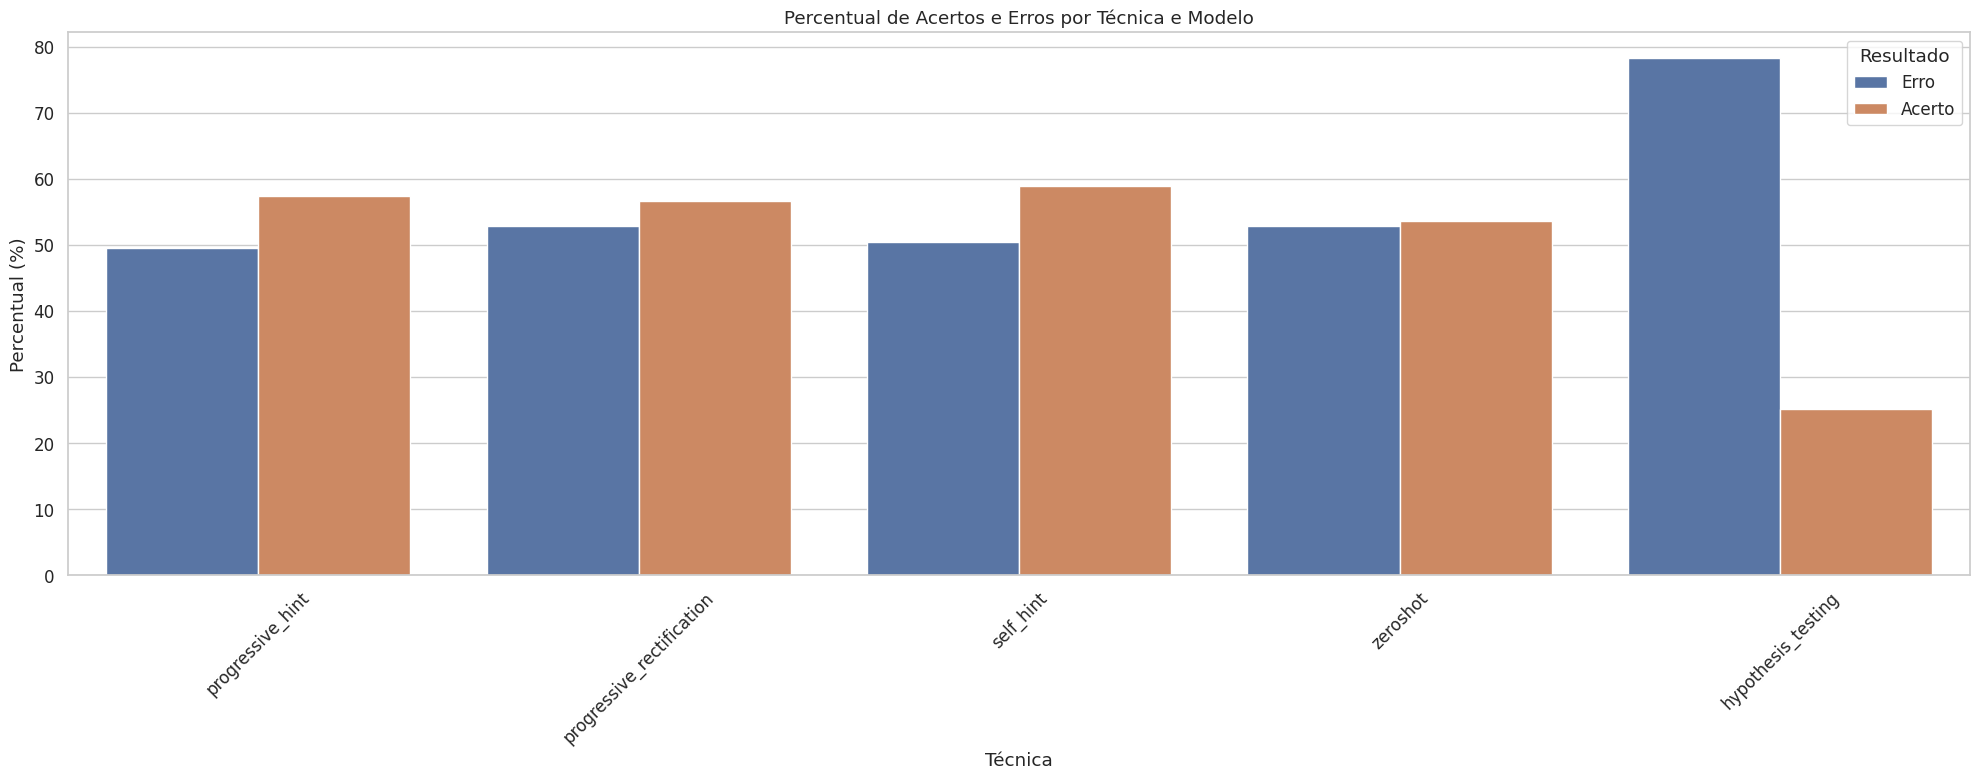

In [82]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=df_counts,
    x='tecnica',
    y='percentual',
    hue='resultado',
    ci=None
)
plt.title('Percentual de Acertos e Erros por Técnica e Modelo')
plt.xlabel('Técnica')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_385828/2228082215.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


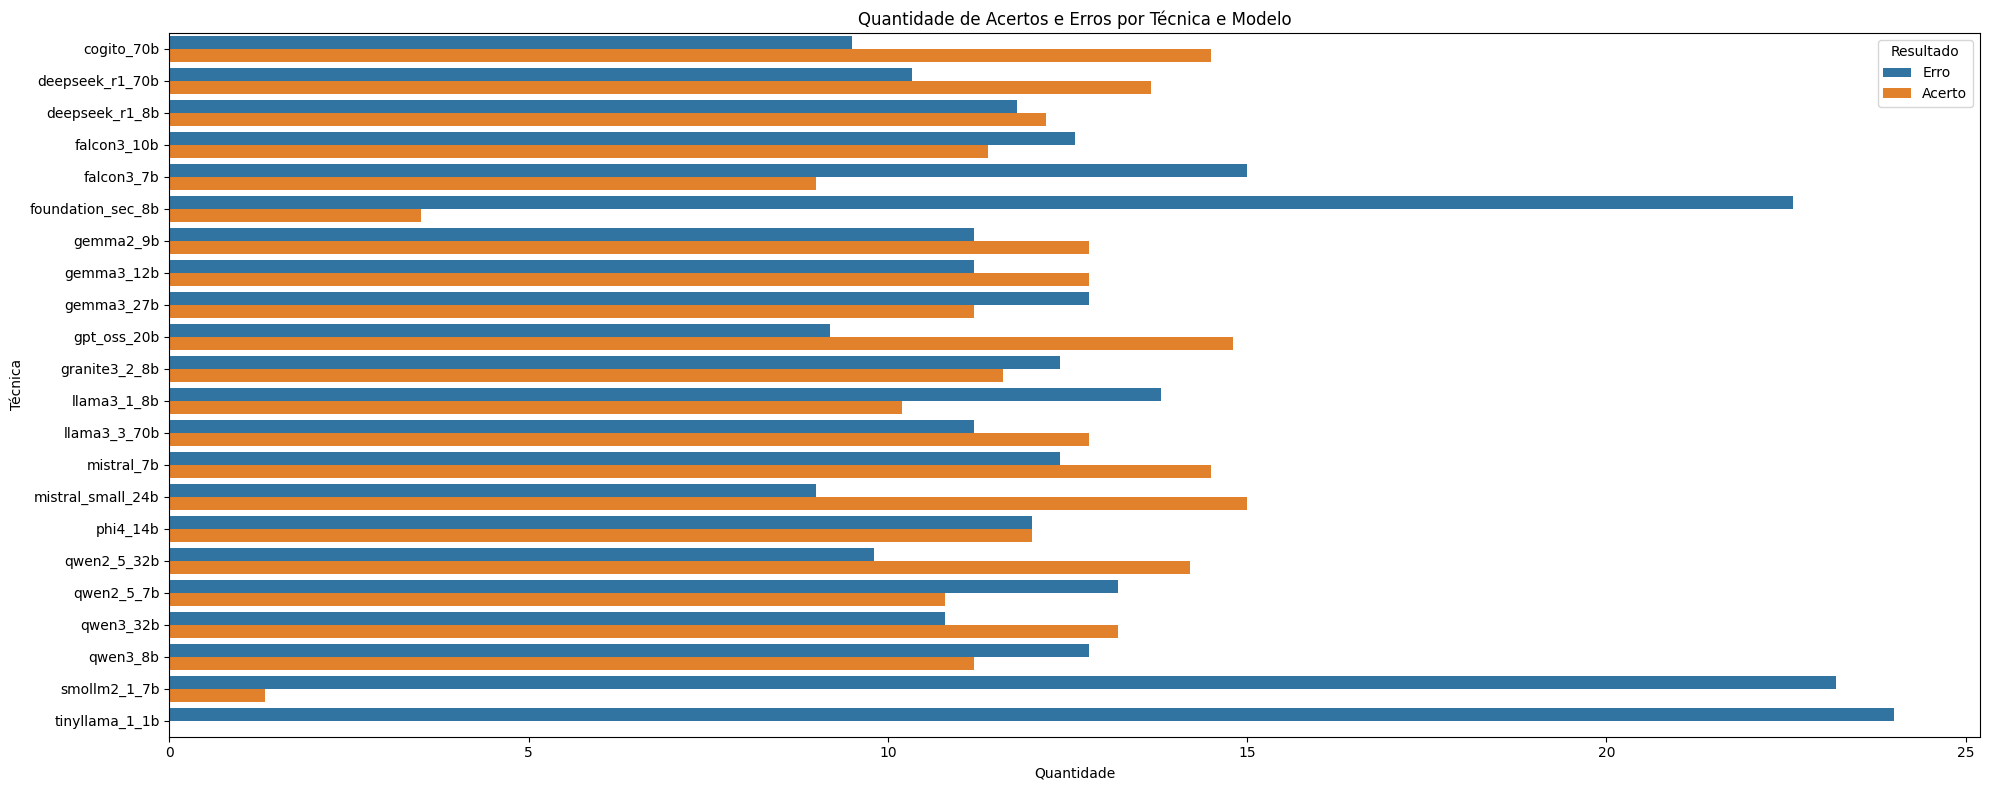

In [35]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=df_counts,
    x='quantidade',
    y='modelo',
    hue='resultado',
    orient='h',
    ci=None
)
plt.title('Quantidade de Acertos e Erros por Técnica e Modelo')
plt.xlabel('Quantidade')
plt.ylabel('Técnica')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_385828/4280230073.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


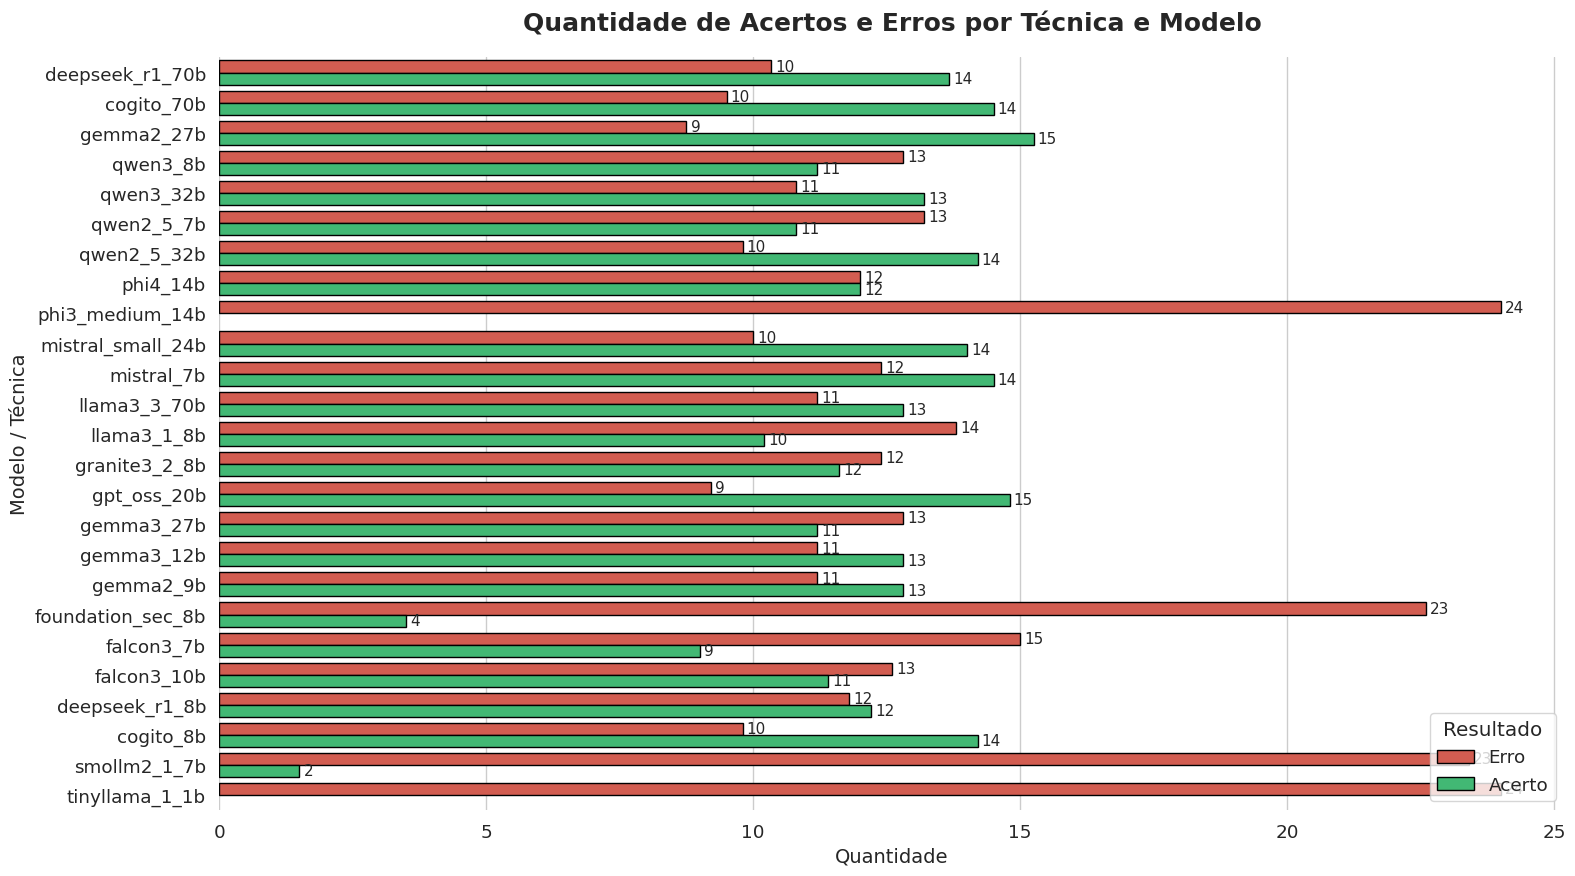

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo e paleta
sns.set_theme(style="whitegrid", font_scale=1.2)
palette = {"Acerto": "#2ecc71", "Erro": "#e74c3c"}

# Ordenar por total de quantidade (somando acertos e erros)
order = (
    df_counts.groupby("modelo")["quantidade"]
    .sum()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(16, 9))
ax = sns.barplot(
    data=df_counts,
    x="quantidade",
    y="modelo",
    hue="resultado",
    orient="h",
    ci=None,
    order=order,
    palette=palette,
    edgecolor="black"
)

# Adicionar rótulos de valores
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=11)

# Melhorar título e legendas
ax.set_title("Quantidade de Acertos e Erros por Técnica e Modelo", fontsize=18, weight="bold", pad=20)
ax.set_xlabel("Quantidade", fontsize=14)
ax.set_ylabel("Modelo / Técnica", fontsize=14)
ax.legend(title="Resultado", loc="lower right", frameon=True)

# Ajustar layout e remover excesso de bordas
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

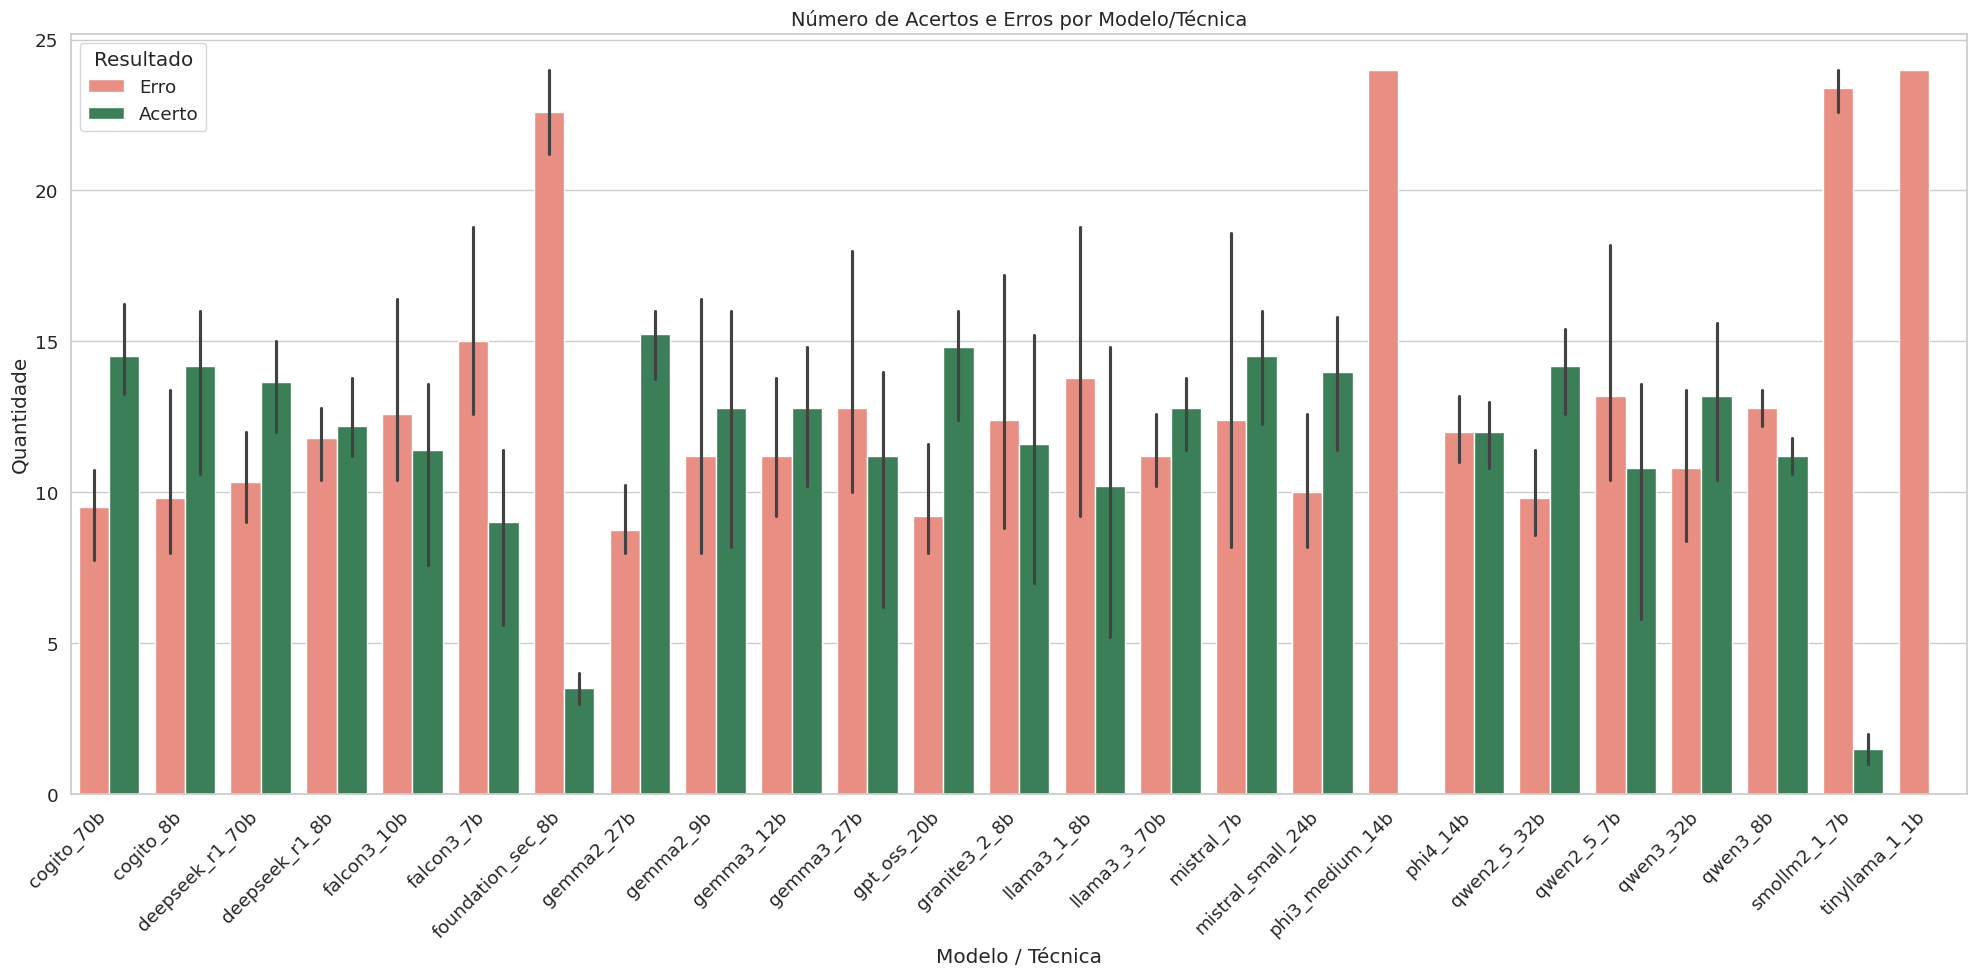

In [84]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_counts,
    x='modelo',
    y='quantidade',
    hue='resultado',
    palette=['salmon', 'seagreen']
)
plt.title('Número de Acertos e Erros por Modelo/Técnica', fontsize=14)
plt.ylabel('Quantidade')
plt.xlabel('Modelo / Técnica')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_385828/3182973734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_385828/3182973734.py:21: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/magalu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


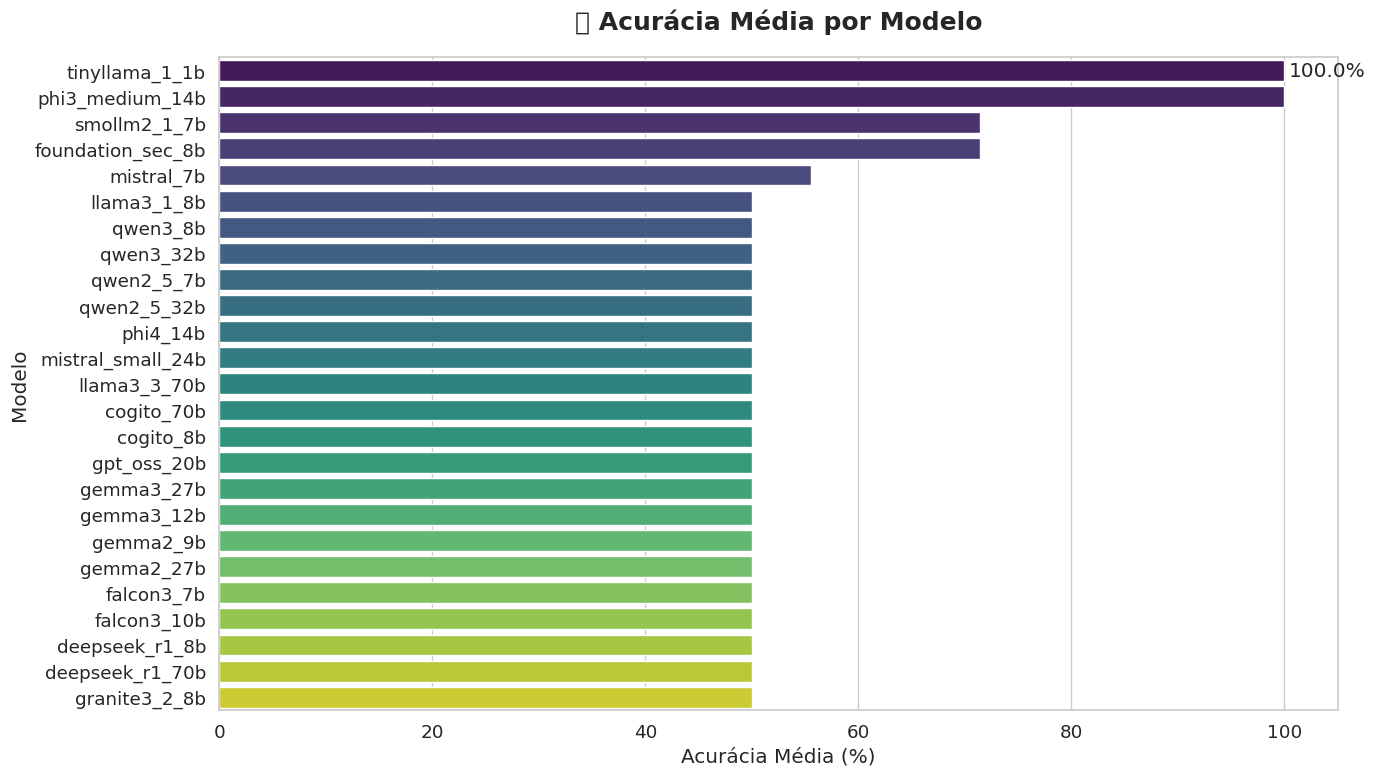

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo geral
sns.set_theme(style="whitegrid", font_scale=1.2)

# Acurácia média por modelo
df_model = df_counts.groupby("modelo", as_index=False)["percentual"].mean().sort_values("percentual", ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_model,
    y="modelo",
    x="percentual",
    palette="viridis"
)
ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.title("🎯 Acurácia Média por Modelo", fontsize=18, weight="bold", pad=20)
plt.xlabel("Acurácia Média (%)")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()

/tmp/ipykernel_385828/3517600793.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_385828/3517600793.py:23: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/magalu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


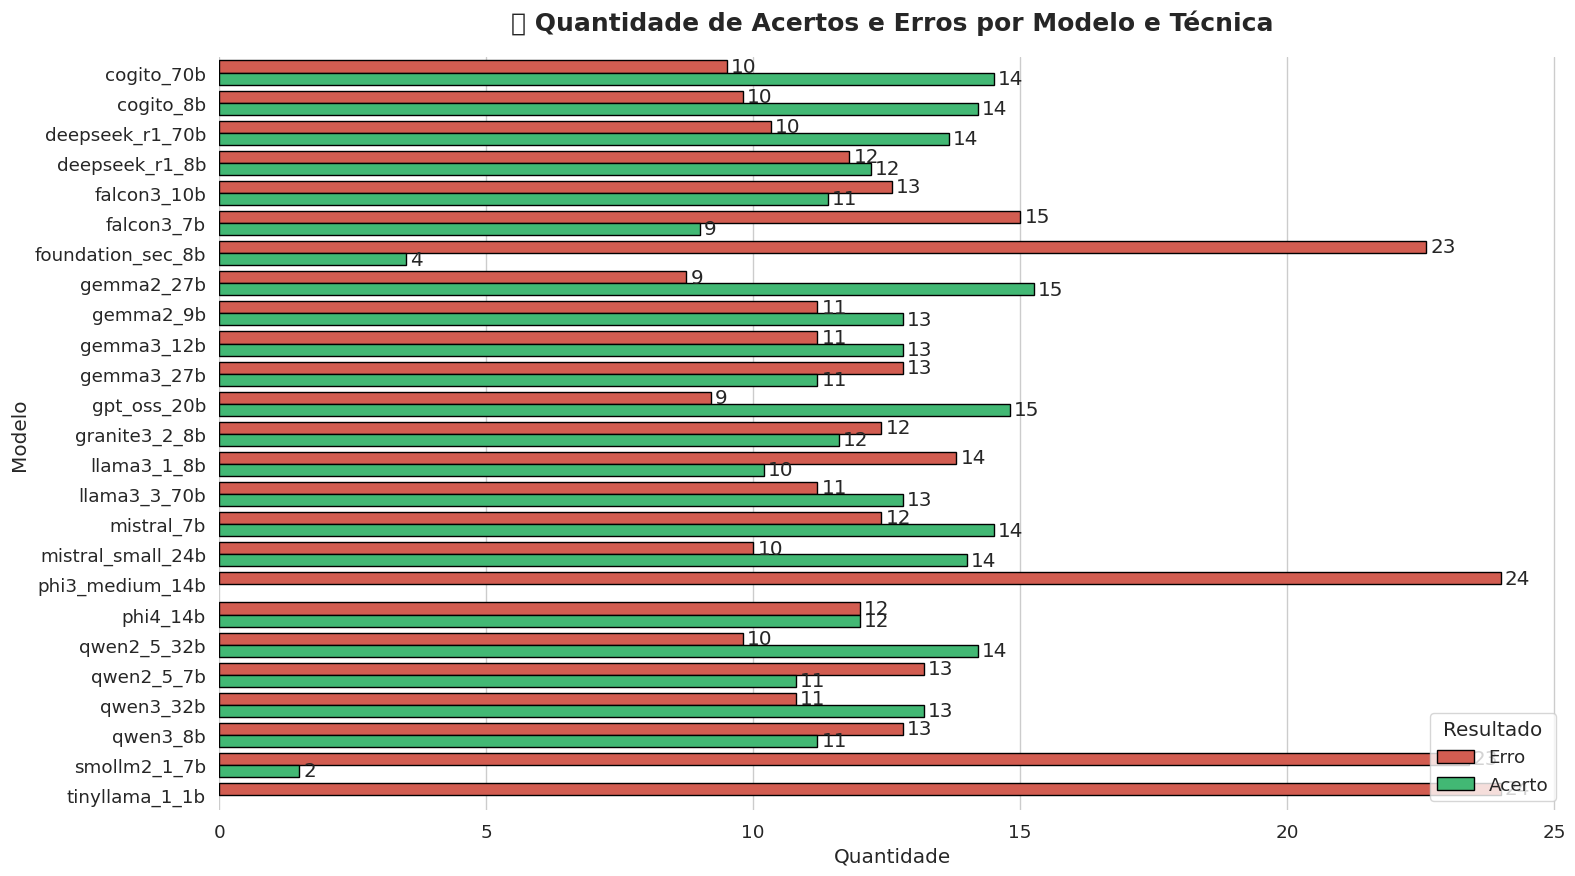

In [86]:
palette = {"Acerto": "#2ecc71", "Erro": "#e74c3c"}

plt.figure(figsize=(16, 9))
ax = sns.barplot(
    data=df_counts,
    x="quantidade",
    y="modelo",
    hue="resultado",
    orient="h",
    ci=None,
    palette=palette,
    edgecolor="black"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("🏁 Quantidade de Acertos e Erros por Modelo e Técnica", fontsize=18, weight="bold", pad=20)
plt.xlabel("Quantidade")
plt.ylabel("Modelo")
plt.legend(title="Resultado", loc="lower right")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_385828/338586423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


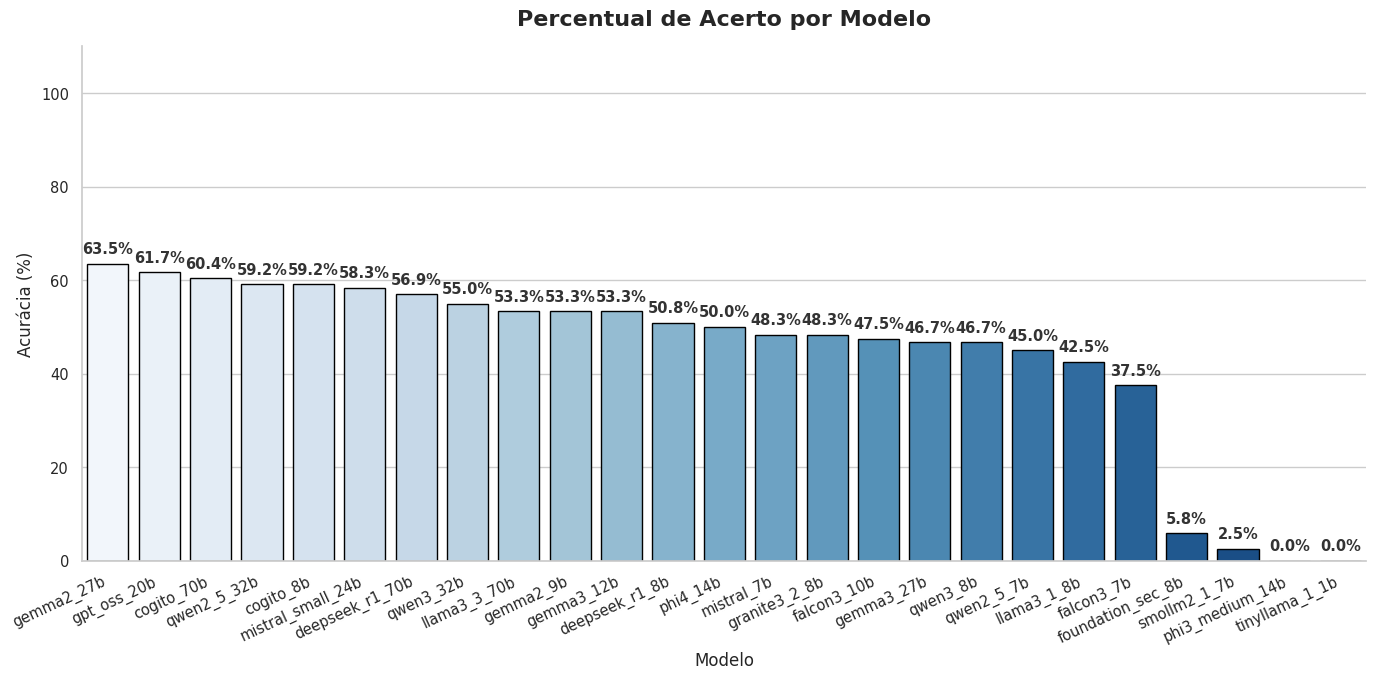

In [87]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Agrupamento e cálculo do percentual
acc_modelo = df_final.groupby("modelo")["acertou"].mean().reset_index()
acc_modelo["percentual"] = acc_modelo["acertou"] * 100

# Criação do gráfico
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=acc_modelo.sort_values("percentual", ascending=False),
    x="modelo",
    y="percentual",
    palette="Blues",       # paleta mais neutra e elegante
    edgecolor="black"
)

# Adiciona os valores percentuais acima das barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom",
        fontsize=10.5, fontweight="semibold", color="#333",
        xytext=(0, 5), textcoords="offset points"
    )

# Ajustes visuais e títulos
plt.title("Percentual de Acerto por Modelo", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Acurácia (%)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=25, ha="right", fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.ylim(0, 110)

sns.despine()  # remove bordas superiores e laterais
plt.tight_layout()
plt.show()


/tmp/ipykernel_385828/3789007795.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


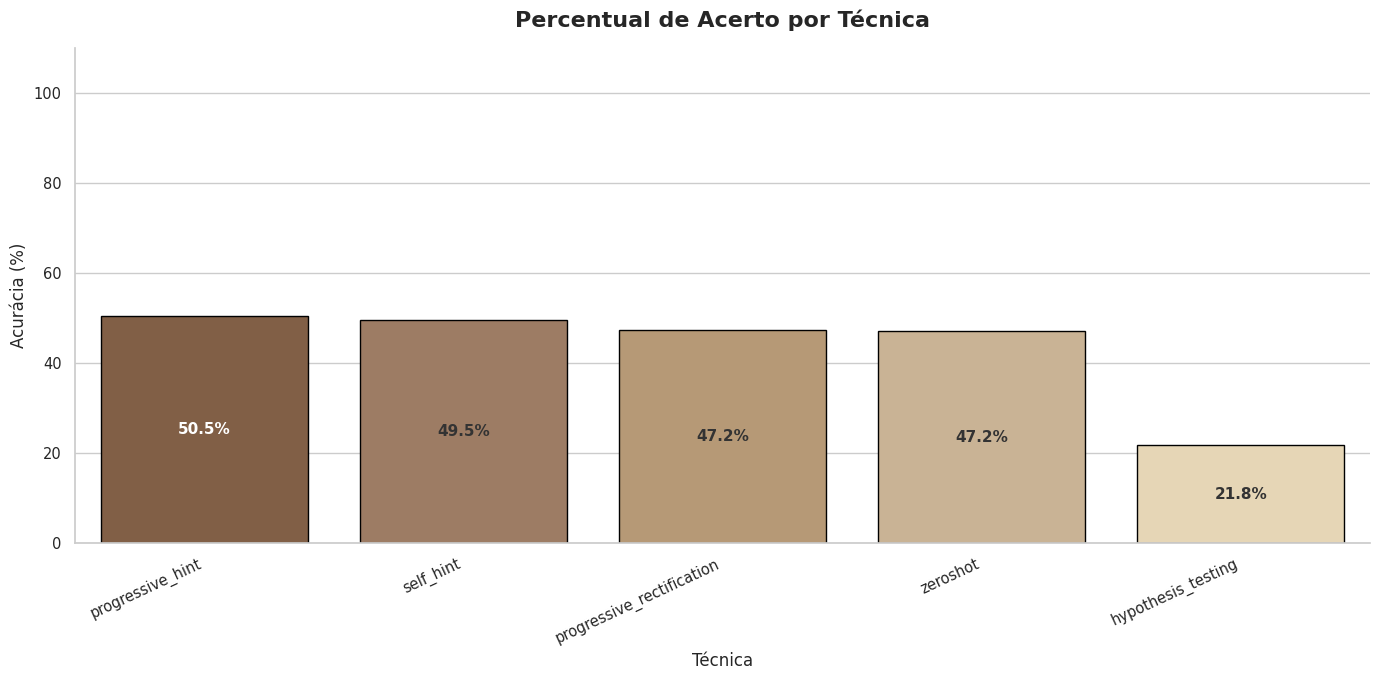

In [88]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Agrupamento e cálculo
acc_tecnica = df_final.groupby("tecnica")["acertou"].mean().reset_index()
acc_tecnica["percentual"] = acc_tecnica["acertou"] * 100

# Paleta em tons terrosos (você pode ajustar as cores manualmente se quiser)
terra_palette = sns.color_palette(["#8B5E3C", "#A67B5B", "#C19A6B", "#D2B48C", "#EED8AE"])

# Criação do gráfico
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=acc_tecnica.sort_values("percentual", ascending=False),
    x="tecnica",
    y="percentual",
    palette=terra_palette,
    edgecolor="black"
)

# Adiciona os valores percentuais *dentro* das barras
for p in ax.patches:
    valor = f"{p.get_height():.1f}%"
    # Calcula o centro da barra
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    # Cor do texto branca se o tom da barra for escuro
    ax.annotate(
        valor, (x, y),
        ha="center", va="center",
        fontsize=11, fontweight="bold",
        color="white" if p.get_facecolor()[0] < 0.6 else "#333"
    )

# Títulos e rótulos
plt.title("Percentual de Acerto por Técnica", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Acurácia (%)", fontsize=12)
plt.xlabel("Técnica", fontsize=12)
plt.xticks(rotation=25, ha="right", fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.ylim(0, 110)

sns.despine()
plt.tight_layout()
plt.show()


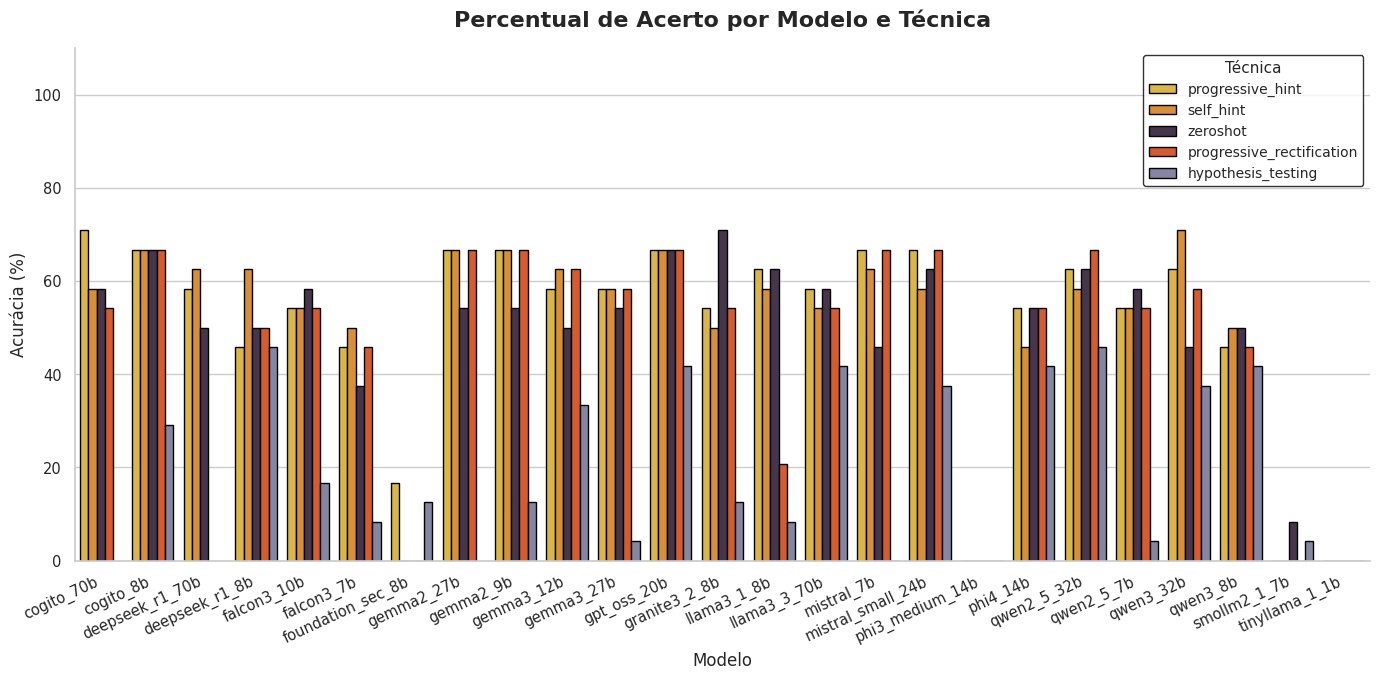

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", font_scale=1.1)

# Agrupamento e cálculo
acc_modtec = df_final.groupby(["modelo", "tecnica"])["acertou"].mean().reset_index()
acc_modtec["percentual"] = acc_modtec["acertou"] * 100

# === 🔹 Ordena dentro de cada modelo (da técnica com mais acertos para a menor) ===
acc_modtec = (
    acc_modtec.sort_values(["modelo", "percentual"], ascending=[True, False])
    .reset_index(drop=True)
)

# Definindo cores fixas por técnica (mantendo o seu padrão)
tecnicas_cores = {
    "progressive_hint": "#F2C230",        # Amarelo terroso
    "self_hint": "#F2921D",               # Laranja
    "progressive_rectification": "#F24F13",  # Laranja queimado
    "hypothesis_testing": "#8082A6",      # Cinza-azulado
    "zeroshot": "#46334F"                 # Vinho escuro
}


# Criação do gráfico base
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=acc_modtec,
    x="modelo",
    y="percentual",
    hue="tecnica",
    palette=tecnicas_cores,
    edgecolor="black"
)

# Adiciona hachura manualmente em cada barra
for i, patch in enumerate(ax.patches):
    tecnica = acc_modtec["tecnica"].iloc[i % len(acc_modtec["tecnica"].unique())]

# Títulos e rótulos
plt.title("Percentual de Acerto por Modelo e Técnica", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Acurácia (%)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=25, ha="right", fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.ylim(0, 110)

# Legenda ajustada
handles, labels = ax.get_legend_handles_labels()
#for handle, tecnica in zip(handles, labels):
    #handle.set_hatch(tecnicas_hachuras.get(tecnica, ""))

plt.legend(
    handles,
    labels,
    title="Técnica",
    title_fontsize=11,
    fontsize=10,
    loc="upper right",
    frameon=True,
    edgecolor="black"
)

sns.despine()
plt.tight_layout()
plt.show()

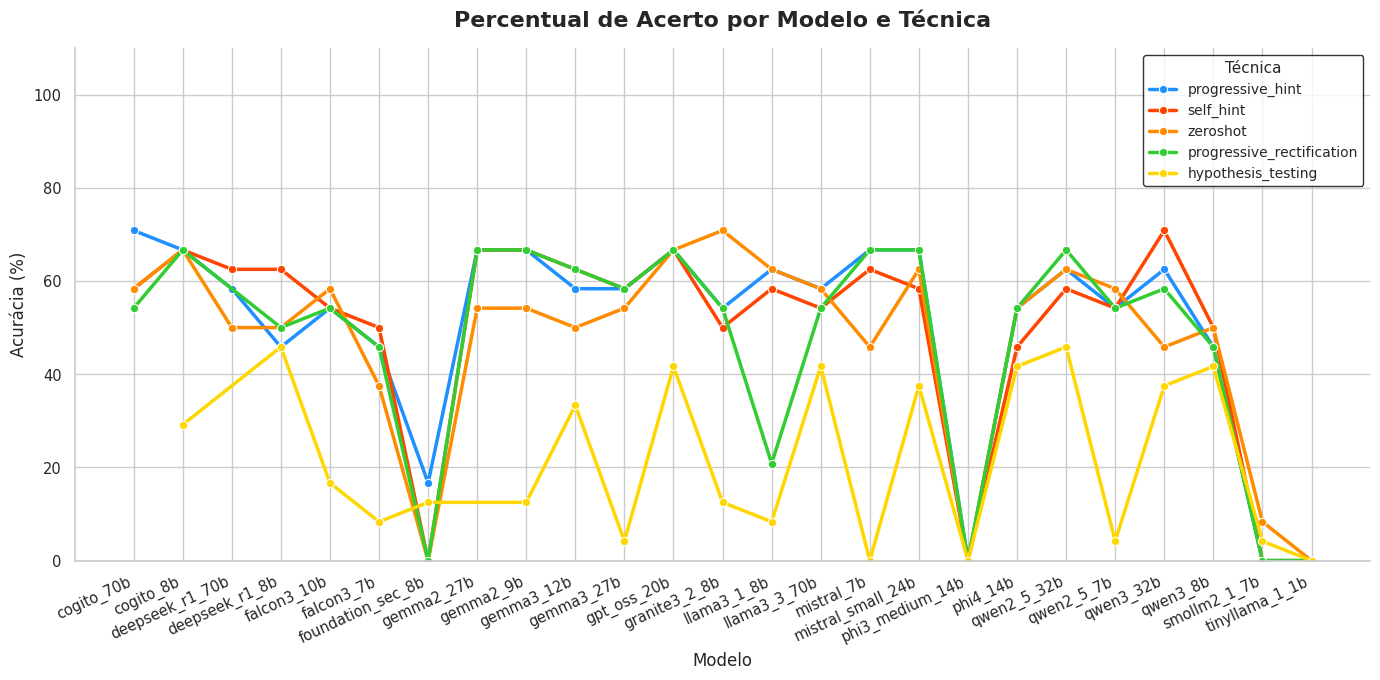

In [90]:
tecnicas_cores = {
    "progressive_hint": "#1E90FF",       # Azul
    "self_hint": "#FF4500",              # Vermelho/laranja queimado
    "progressive_rectification": "#32CD32",  # Verde
    "hypothesis_testing": "#FFD700",     # Amarelo
    "zeroshot": "#FF8C00"                # Laranja
}

# Criação do gráfico de linhas
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=acc_modtec,
    x="modelo",
    y="percentual",
    hue="tecnica",
    palette=tecnicas_cores,
    marker="o",
    linewidth=2.5
)

# Títulos e eixos
plt.title("Percentual de Acerto por Modelo e Técnica", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Acurácia (%)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=25, ha="right", fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.ylim(0, 110)

# Legenda com aparência refinada
plt.legend(
    title="Técnica",
    title_fontsize=11,
    fontsize=10,
    loc="upper right",
    frameon=True,
    edgecolor="black"
)

sns.despine()
plt.tight_layout()
plt.show()

# Análise de categoria:

| Código | Categoria | Descrição | Exemplos Típicos |
|--------|----------|-----------|-----------------|
| CAT1-Comprometimento de Conta | CAT1 | Comprometimento de Conta | Acesso não autorizado a contas de usuários ou administradores. Phishing de credenciais, brute force SSH bem-sucedido, roubo de token OAuth, comprometimento de SSO. |
| CAT2-Malware | CAT2 | Malware | Infecção por código malicioso que compromete dispositivos ou dados. Ransomware, vírus de macro, cavalo de Troia, spyware, worms de propagação automática. |
| CAT3-Ataque de Negação de Serviço (DoS/DDoS) | CAT3 | Ataque de Negação de Serviço (DoS/DDoS) | Tornar sistemas ou redes indisponíveis. DDoS HTTP/S, volumétrico (UDP flood, SYN flood), ataque a APIs públicas, botnet Mirai atacando servidor web. |
| CAT4-Exfiltração ou Vazamento de Dados | CAT4 | Exfiltração ou Vazamento de Dados | Acesso, cópia ou divulgação não autorizada de dados sensíveis. Roubo de banco de dados, vazamento de credenciais, exposição de backups públicos, ransomware com exfiltração. |
| CAT5-Exploração de Vulnerabilidade | CAT5 | Exploração de Vulnerabilidade | Uso de falhas conhecidas ou desconhecidas para comprometer ativos. Exploração de CVE crítica em firewall, execução remota de código (RCE), SQL injection em aplicações web. |
| CAT6-Abuso Interno | CAT6 | Abuso Interno | Ações intencionais ou negligentes de usuários internos. Cópia de dados sigilosos, sabotagem de sistemas, abuso de privilégios em dados sensíveis. |
| CAT7-Engenharia Social | CAT7 | Engenharia Social | Engano de pessoas para obter acesso ou informações. Phishing, vishing, pretexting, fraude do CEO (fake CEO scam). |
| CAT8-Incidente Físico ou de Infraestrutura | CAT8 | Incidente Físico ou de Infraestrutura | Violação física que impacta ativos computacionais. Roubo de notebook, arrombamento de datacenter, destruição física de switches ou roteadores. |
| CAT9-Alteração Não Autorizada | CAT9 | Alteração Não Autorizada | Modificação não autorizada em sistemas, dados ou configurações. Defacement de websites, alteração maliciosa de firewall, manipulação de registros financeiros. |
| CAT10-Uso Indevido de Recursos | CAT10 | Uso Indevido de Recursos | Uso não autorizado de sistemas para outros fins. Mineração de criptomoeda, distribuição de malware pela rede da empresa, uso pessoal de servidores corporativos. |
| CAT11-Problema de Fornecedor/Terceiro | CAT11 | Problema de Fornecedor/Terceiro | Incidente originado por falha de segurança de terceiros. Breach em provedor cloud (S3 buckets), ataque de supply chain (SolarWinds), vazamento em SaaS. |
| CAT12-Tentativa de Intrusão | CAT12 | Tentativa de Intrusão | Tentativas hostis de invasão ainda não confirmadas como bem-sucedidas. Scans de rede (Nmap, Masscan), brute force SSH, tentativas de login inválido, exploits bloqueados. |


In [45]:
- **CAT1: Account Compromise** – unauthorized access to user or administrator accounts.  
  Examples: credential phishing, SSH brute force, OAuth token theft.  
  Search terms: ["phishing", "brute force", "unauthorized access", "compromised password", "credential theft", "account compromise", "token", "oauth", "ssh", "suspicious login"]



- **CAT12: Intrusion Attempt** – unconfirmed or prevented attacks.
  Examples: network scans, brute force attempts, blocked exploit attempts. 
  Search terms: ["intrusion attempt", "scan", "reconnaissance", "probing", "port scan", "blocked exploit", "failed attempt"]

SyntaxError: invalid character '–' (U+2013) (26585139.py, line 1)

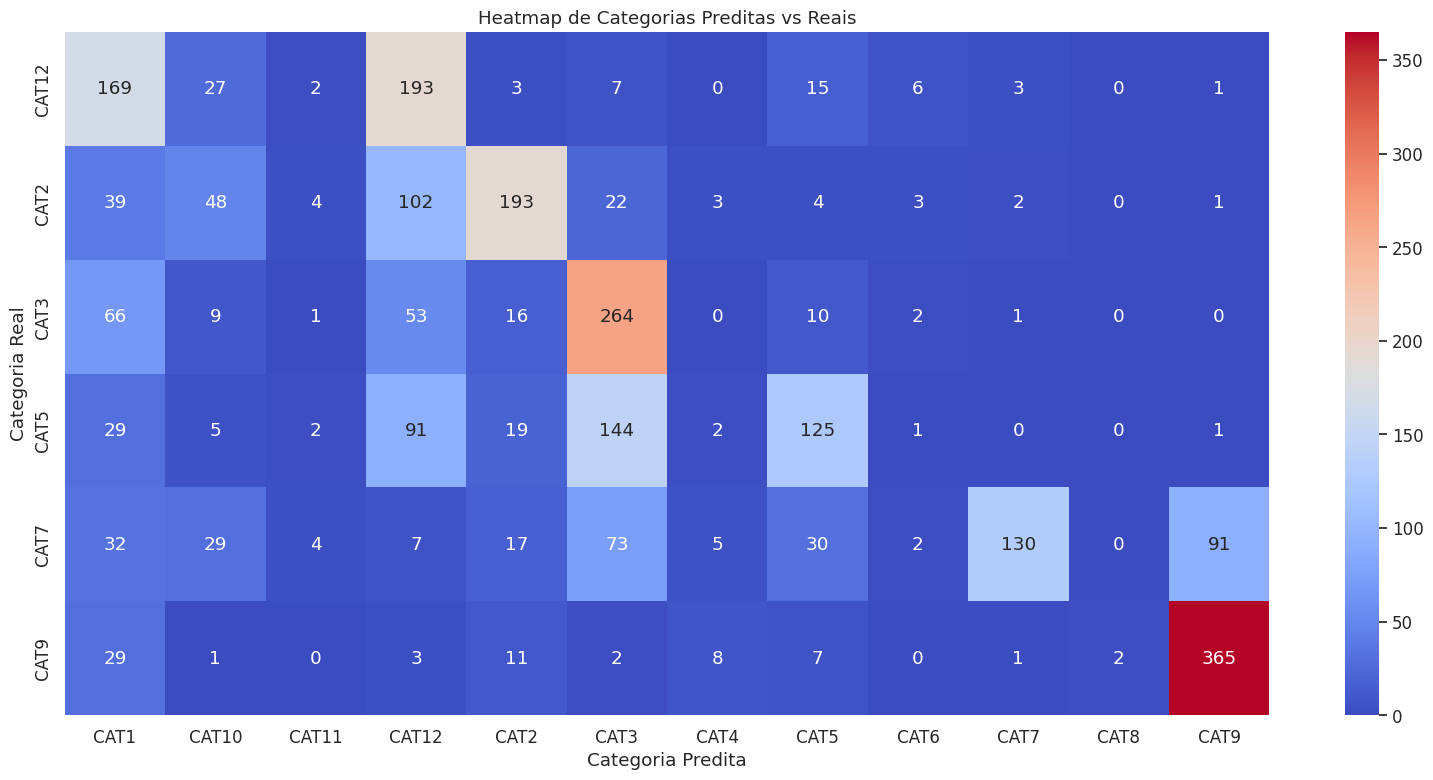

In [91]:
df_filtered = df_final[df_final["categoria_predita"].str.match(r"CAT\d+", na=False)]

# Matriz de confusão com valores absolutos
conf_matrix = pd.crosstab(
    df_filtered["categoria"],
    df_filtered["categoria_predita"]
)

plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Heatmap de Categorias Preditas vs Reais")
plt.xlabel("Categoria Predita")
plt.ylabel("Categoria Real")
plt.tight_layout()
plt.show()

In [47]:
df_erros = df_final[df_final["acertou"] == 0].copy()
trocas = df_erros.groupby(["id","categoria", "categoria_predita"]).size().reset_index(name="quantidade")
trocas_top = trocas.sort_values("quantidade", ascending=False).head(5)
trocas_top

id categoria categoria_predita  quantidade
111  RNP2022-095709      CAT7              CAT9          77
166  RNP2023-014128      CAT5              CAT3          64
9    RNP2021-014273      CAT5             CAT12          62
206  RNP2023-123500      CAT7              CAT3          60
218  RNP2024-031572      CAT5              CAT3          56

In [48]:
# Escrever no arquivo
with open('RNP2022-026802_target.txt', 'w') as arquivo:
    valor_target = df_final[df_final["id"] == "RNP2022-026802"]['target'].values[0]
    arquivo.write(str(valor_target))

# Imprimir o valor (opcional)
print(df_final[df_final["id"] == "RNP2022-026802"]['target'].values[0])

[DATE_TIME_c056487b2c] 12:51 CERT.br: 
Data de envio: Mar 24, 2022 12:49 PM
Para: [EMAIL_ADDRESS_8cde2003d3], [EMAIL_ADDRESS_f6f7086365], [EMAIL_ADDRESS_a0a85d701e]
CC: [EMAIL_ADDRESS_83824c64b2]
Assunto: Re: Abuse from [IP_ADDRESS_b29a075d57]

Hello,

CERT.br works as a coordinating team for incidents and abuses related
to Brazilian networks. We are listed in the "remarks" notes of the
Brazilian Whois Server output to receive copies of complaints, but we
are not the technical or abuse contact of any network.

We are forwarding your email to the proper contacts for this network
so they can handle this incident.

Original message was attached to this email.

Thank you for reporting this incident,
--
CERT.br/NIC.br
<[EMAIL_ADDRESS_83824c64b2]>
[URL_ef2283438e]

----- Original message as text -----
From: [EMAIL_ADDRESS_a6be39e7e9] (root)
To: [EMAIL_ADDRESS_c4122f8a60],[EMAIL_ADDRESS_83824c64b2]
Subject: Abuse from [IP_ADDRESS_b29a075d57]
Date: Thu, 24 Mar 2022 16:35:03 +0100 (CET)
Message

In [49]:
df_final[(df_final["id"] == "RNP2022-026802") & (df_final["tecnica"] == "zeroshot")].groupby(['categoria_predita','modelo']).count().reset_index()

categoria_predita             modelo  id  explicacao_predita  parametro  \
0               CAT1    deepseek_r1_70b   1                   1          1   
1               CAT1     deepseek_r1_8b   1                   1          1   
2               CAT1         falcon3_7b   1                   1          1   
3               CAT1          gemma2_9b   1                   1          1   
4               CAT1         gemma3_27b   1                   1          1   
5               CAT1      granite3_2_8b   1                   1          1   
6               CAT1       llama3_3_70b   1                   1          1   
7               CAT1         mistral_7b   1                   1          1   
8               CAT1           phi4_14b   1                   1          1   
9               CAT1        qwen2_5_32b   1                   1          1   
10              CAT1          qwen3_32b   1                   1          1   
11              CAT1           qwen3_8b   1                   1          1   
12             CAT10       smollm2_1_7b   1                   1          1   
13             CAT12         cogito_70b   1                   1          1   
14             CAT12        falcon3_10b   1                   1          1   
15             CAT12         gemma3_12b   1                   1          1   
16             CAT12        gpt_oss_20b   1                   1          1   
17             CAT12        llama3_1_8b   1                   1          1   
18             CAT12  mistral_small_24b   1                   1          1   
19             CAT12         qwen2_5_7b   1                   1          1   
20              CAT5  foundation_sec_8b   1                   1          1   
21           Unknown     tinyllama_1_1b   1                   1          1   

    tecnica  target  categoria  acertou  
0         1       1          1        1  
1         1       1          1        1  
2         1       1          1        1  
3         1       1          1        1  
4         1       1          1        1  
5         1       1          1        1  
6         1       1          1        1  
7         1       1          1        1  
8         1       1          1        1  
9         1       1          1        1  
10        1       1          1        1  
11        1       1          1        1  
12        1       1          1        1  
13        1       1          1        1  
14        1       1          1        1  
15        1       1          1        1  
16        1       1          1        1  
17        1       1          1        1  
18        1       1          1        1  
19        1       1          1        1  
20        1       1          1        1  
21        1       1          1        1

In [50]:
df_final[['id','explicacao_predita']]

id                                 explicacao_predita
0     RNP2022-125941  This incident represents an intrusion attempt ...
1     RNP2022-026802  This incident represents an intrusion attempt ...
2     RNP2022-042745  This incident represents an intrusion attempt ...
3     RNP2022-026209  This incident represents an intrusion attempt ...
4     RNP2023-049266  The incident clearly describes a malware infec...
...              ...                                                ...
2467  RNP2022-095709                                            Unknown
2468  RNP2021-056045                                            Unknown
2469  RNP2022-104330                                            Unknown
2470  RNP2021-056046                                            Unknown
2471  RNP2021-057597                                            Unknown

[2472 rows x 2 columns]

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:

df_parcial = df_final[(df_final["id"] == "RNP2022-026802") & (df_final["tecnica"] == "zeroshot")]
# 1. Obter o target do id RNP2022-026802
target_referencia = df_final[df_final["id"] == "RNP2022-026802"]['target'].values[0]

# 2. Preparar os textos para comparação
textos_para_comparar = [target_referencia] + df_parcial['explicacao_predita'].tolist()

# 3. Vetorizar os textos usando TF-IDF
vectorizer = TfidfVectorizer()
vetores = vectorizer.fit_transform(textos_para_comparar)

# 4. Separar o vetor do target (primeiro vetor) dos vetores das explicações preditas
vetor_target = vetores[0]
vetores_explicacoes = vetores[1:]

# 5. Calcular similaridade de cosseno entre cada explicação predita e o target
similaridades = cosine_similarity(vetor_target, vetores_explicacoes)

# 6. Adicionar os resultados ao DataFrame
df_parcial['similaridade_com_target_RNP2022-026802'] = similaridades.flatten()

# Mostrar resultados
print(f"Target de referência (RNP2022-026802): {target_referencia}")
print("\nDataFrame com similaridades:")
print(df_parcial[['id', 'explicacao_predita', 'similaridade_com_target_RNP2022-026802']].head())

# Ordenar por similaridade (mais similares primeiro)
df_ordenado = df_parcial.sort_values('similaridade_com_target_RNP2022-026802', ascending=False)
print(f"\nTop 5 mais similares ao target RNP2022-026802:")
print(df_ordenado[['id', 'similaridade_com_target_RNP2022-026802']].head())

Target de referência (RNP2022-026802): [DATE_TIME_c056487b2c] 12:51 CERT.br: 
Data de envio: Mar 24, 2022 12:49 PM
Para: [EMAIL_ADDRESS_8cde2003d3], [EMAIL_ADDRESS_f6f7086365], [EMAIL_ADDRESS_a0a85d701e]
CC: [EMAIL_ADDRESS_83824c64b2]
Assunto: Re: Abuse from [IP_ADDRESS_b29a075d57]

Hello,

CERT.br works as a coordinating team for incidents and abuses related
to Brazilian networks. We are listed in the "remarks" notes of the
Brazilian Whois Server output to receive copies of complaints, but we
are not the technical or abuse contact of any network.

We are forwarding your email to the proper contacts for this network
so they can handle this incident.

Original message was attached to this email.

Thank you for reporting this incident,
--
CERT.br/NIC.br
<[EMAIL_ADDRESS_83824c64b2]>
[URL_ef2283438e]

----- Original message as text -----
From: [EMAIL_ADDRESS_a6be39e7e9] (root)
To: [EMAIL_ADDRESS_c4122f8a60],[EMAIL_ADDRESS_83824c64b2]
Subject: Abuse from [IP_ADDRESS_b29a075d57]
Date: Thu, 2

/tmp/ipykernel_385828/3896132320.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcial['similaridade_com_target_RNP2022-026802'] = similaridades.flatten()


In [53]:
df_ordenado[['id', 'modelo','categoria_predita','categoria']]

id             modelo categoria_predita categoria
1465  RNP2022-026802       llama3_3_70b              CAT1     CAT12
1225  RNP2022-026802      granite3_2_8b              CAT1     CAT12
1969  RNP2022-026802         qwen2_5_7b             CAT12     CAT12
385   RNP2022-026802        falcon3_10b             CAT12     CAT12
73    RNP2022-026802         cogito_70b             CAT12     CAT12
985   RNP2022-026802         gemma3_27b              CAT1     CAT12
2089  RNP2022-026802          qwen3_32b              CAT1     CAT12
1729  RNP2022-026802           phi4_14b              CAT1     CAT12
505   RNP2022-026802         falcon3_7b              CAT1     CAT12
1609  RNP2022-026802  mistral_small_24b             CAT12     CAT12
745   RNP2022-026802          gemma2_9b              CAT1     CAT12
865   RNP2022-026802         gemma3_12b             CAT12     CAT12
1849  RNP2022-026802        qwen2_5_32b              CAT1     CAT12
1585  RNP2022-026802         mistral_7b              CAT1     CAT12
1345  RNP2022-026802        llama3_1_8b             CAT12     CAT12
145   RNP2022-026802    deepseek_r1_70b              CAT1     CAT12
625   RNP2022-026802  foundation_sec_8b              CAT5     CAT12
1105  RNP2022-026802        gpt_oss_20b             CAT12     CAT12
2209  RNP2022-026802           qwen3_8b              CAT1     CAT12
265   RNP2022-026802     deepseek_r1_8b              CAT1     CAT12
2329  RNP2022-026802       smollm2_1_7b             CAT10     CAT12
2449  RNP2022-026802     tinyllama_1_1b           Unknown     CAT12

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF por modelo
resultados_tfidf = {}

for modelo in df_parcial['modelo'].unique():
    textos_modelo = df_parcial[df_parcial['modelo'] == modelo]['explicacao_predita'].tolist()
    
    vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(textos_modelo)
    
    # Soma dos scores TF-IDF para cada palavra
    scores_tfidf = pd.DataFrame({
        'palavra': vectorizer.get_feature_names_out(),
        'tfidf_sum': tfidf_matrix.sum(axis=0).A1
    })
    
    # Ordenar por TF-IDF
    top_palavras = scores_tfidf.sort_values('tfidf_sum', ascending=False).head(10)
    resultados_tfidf[modelo] = top_palavras

# Exibir resultados TF-IDF
for modelo, df_palavras in resultados_tfidf.items():
    print(f"\n=== Modelo: {modelo} (TF-IDF) ===")
    for _, row in df_palavras.iterrows():
        print(f"{row['palavra']}: {row['tfidf_sum']:.4f}")


=== Modelo: cogito_70b (TF-IDF) ===
attempts: 0.4082
access: 0.1361
single: 0.1361
log: 0.1361
login: 0.1361
messages: 0.1361
multiple: 0.1361
occurred: 0.1361
presence: 0.1361
prevented: 0.1361

=== Modelo: deepseek_r1_70b (TF-IDF) ===
accounts: 0.2425
force: 0.2425
user: 0.2425
suggesting: 0.2425
ssh: 0.2425
repeated: 0.2425
logs: 0.2425
invalid: 0.2425
failed: 0.2425
aimed: 0.2425

=== Modelo: deepseek_r1_8b (TF-IDF) ===
access: 0.2132
account: 0.2132
ssh: 0.2132
single: 0.2132
repeated: 0.2132
login: 0.2132
ip: 0.2132
involves: 0.2132
indicating: 0.2132
incident: 0.2132

=== Modelo: falcon3_10b (TF-IDF) ===
attempts: 0.3651
accounts: 0.1826
fit: 0.1826
unsuccessful: 0.1826
unconfirmed: 0.1826
specific: 0.1826
repeated: 0.1826
prevented: 0.1826
password: 0.1826
ip: 0.1826

=== Modelo: falcon3_7b (TF-IDF) ===
attempts: 0.3780
access: 0.1890
incident: 0.1890
unauthorized: 0.1890
trying: 0.1890
ssh: 0.1890
nist: 0.1890
multiple: 0.1890
login: 0.1890
ip: 0.1890

=== Modelo: foundation_

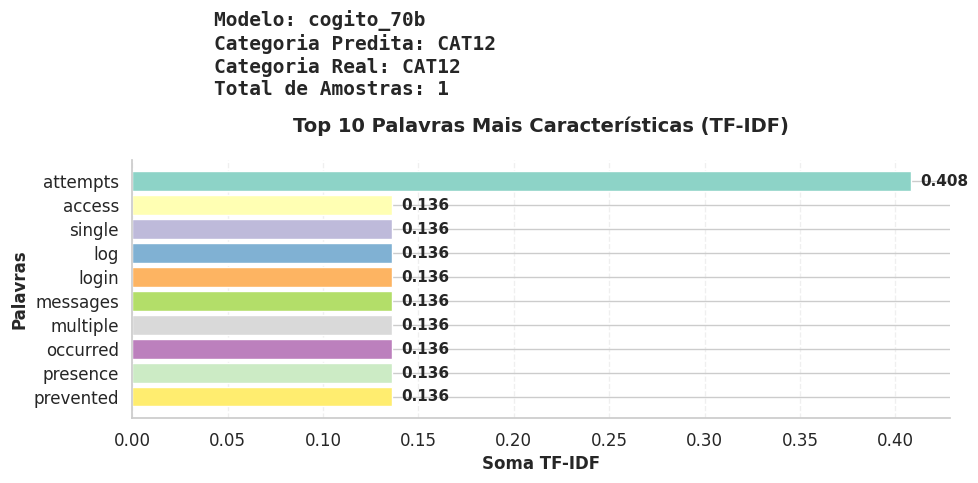


📊 Modelo: cogito_70b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempts             0.4082
access               0.1361
single               0.1361
log                  0.1361
login                0.1361
messages             0.1361
multiple             0.1361
occurred             0.1361
presence             0.1361
prevented            0.1361



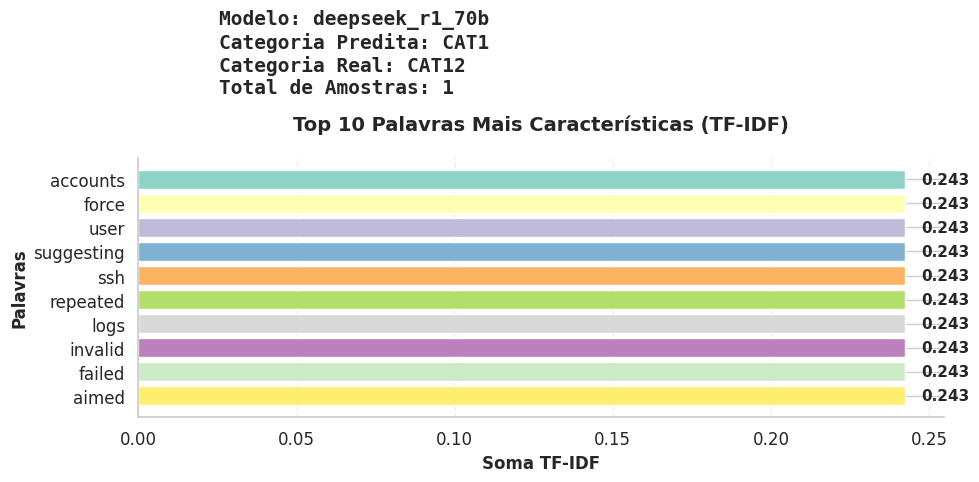


📊 Modelo: deepseek_r1_70b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
accounts             0.2425
force                0.2425
user                 0.2425
suggesting           0.2425
ssh                  0.2425
repeated             0.2425
logs                 0.2425
invalid              0.2425
failed               0.2425
aimed                0.2425



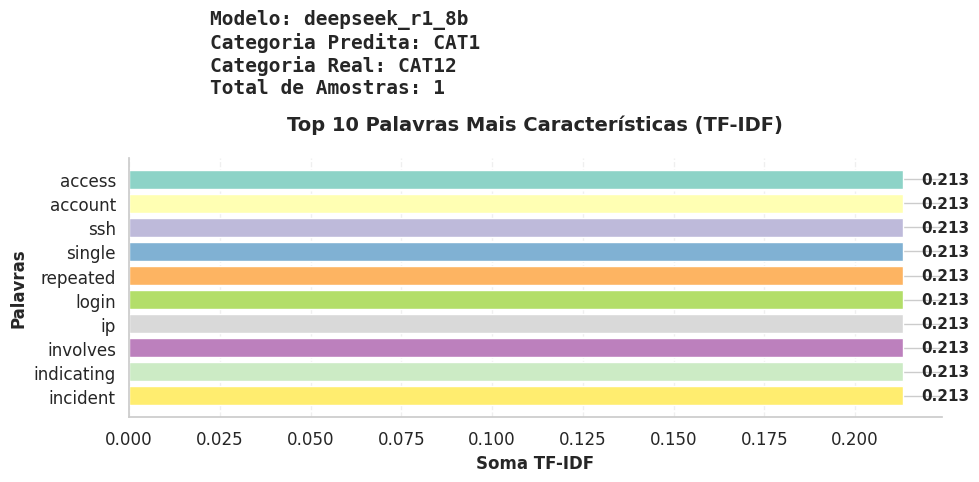


📊 Modelo: deepseek_r1_8b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
access               0.2132
account              0.2132
ssh                  0.2132
single               0.2132
repeated             0.2132
login                0.2132
ip                   0.2132
involves             0.2132
indicating           0.2132
incident             0.2132



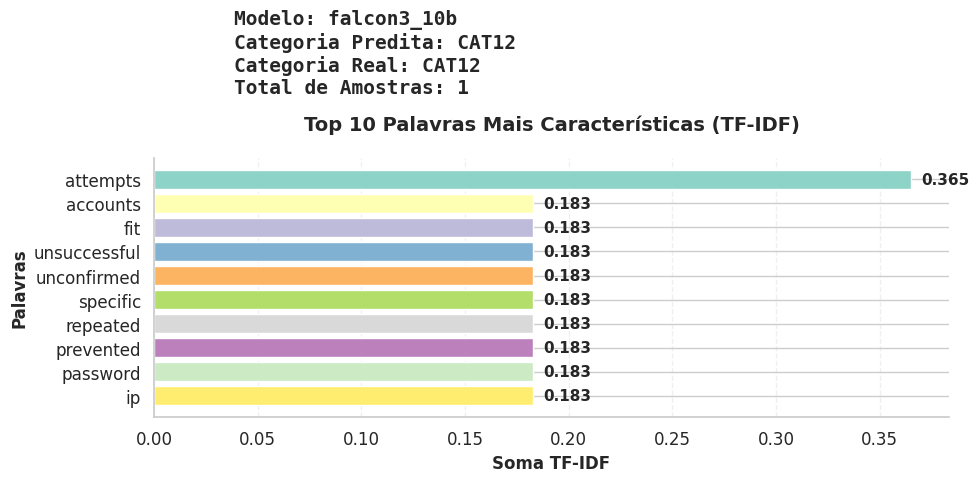


📊 Modelo: falcon3_10b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempts             0.3651
accounts             0.1826
fit                  0.1826
unsuccessful         0.1826
unconfirmed          0.1826
specific             0.1826
repeated             0.1826
prevented            0.1826
password             0.1826
ip                   0.1826



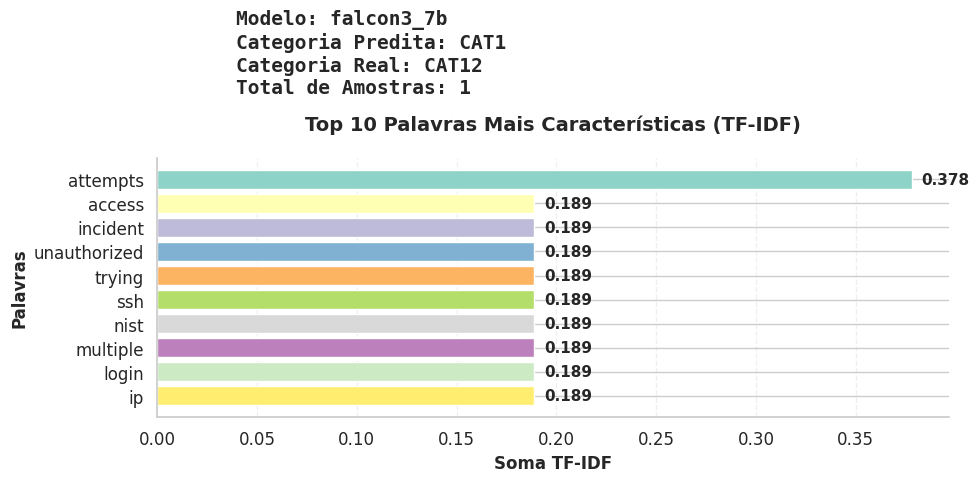


📊 Modelo: falcon3_7b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempts             0.3780
access               0.1890
incident             0.1890
unauthorized         0.1890
trying               0.1890
ssh                  0.1890
nist                 0.1890
multiple             0.1890
login                0.1890
ip                   0.1890



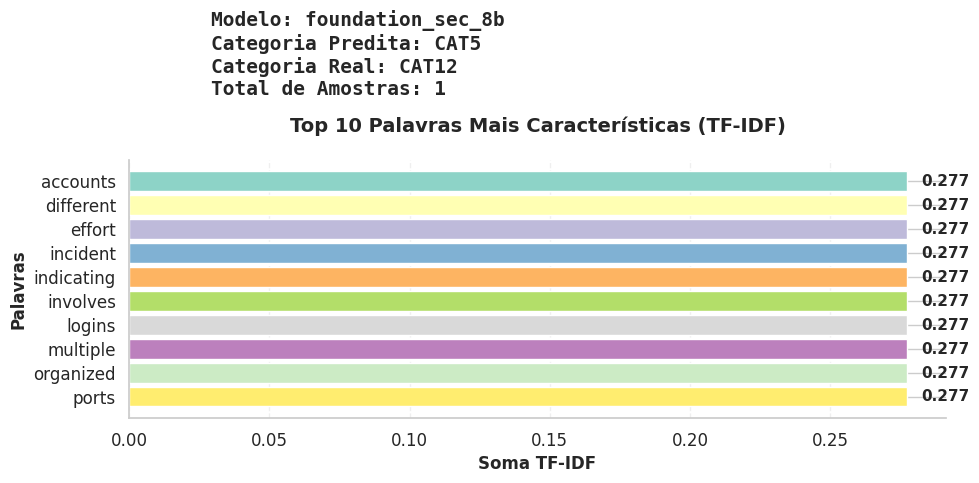


📊 Modelo: foundation_sec_8b
🎯 Categoria Predita: CAT5
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
accounts             0.2774
different            0.2774
effort               0.2774
incident             0.2774
indicating           0.2774
involves             0.2774
logins               0.2774
multiple             0.2774
organized            0.2774
ports                0.2774



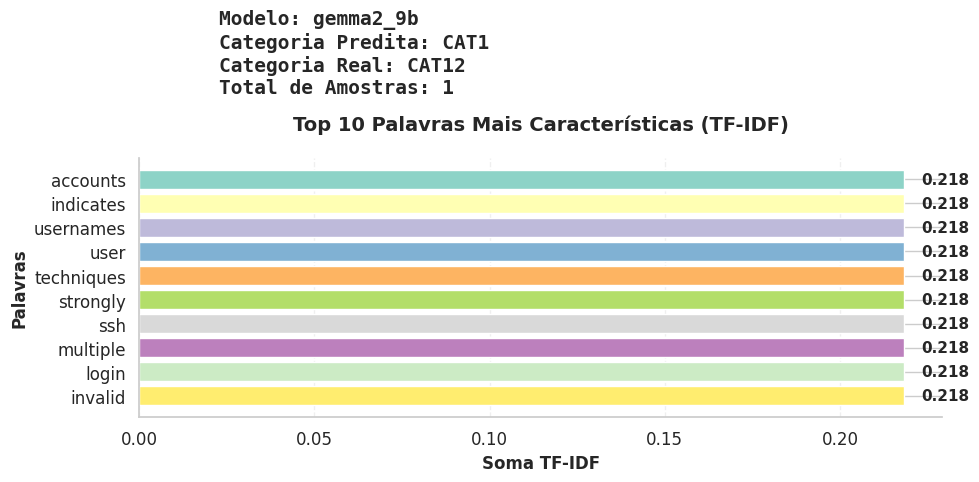


📊 Modelo: gemma2_9b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
accounts             0.2182
indicates            0.2182
usernames            0.2182
user                 0.2182
techniques           0.2182
strongly             0.2182
ssh                  0.2182
multiple             0.2182
login                0.2182
invalid              0.2182



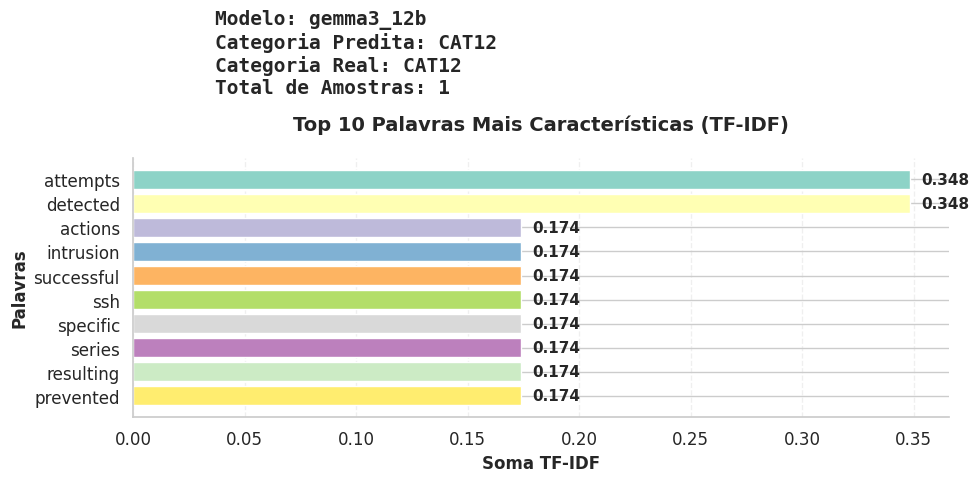


📊 Modelo: gemma3_12b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempts             0.3482
detected             0.3482
actions              0.1741
intrusion            0.1741
successful           0.1741
ssh                  0.1741
specific             0.1741
series               0.1741
resulting            0.1741
prevented            0.1741



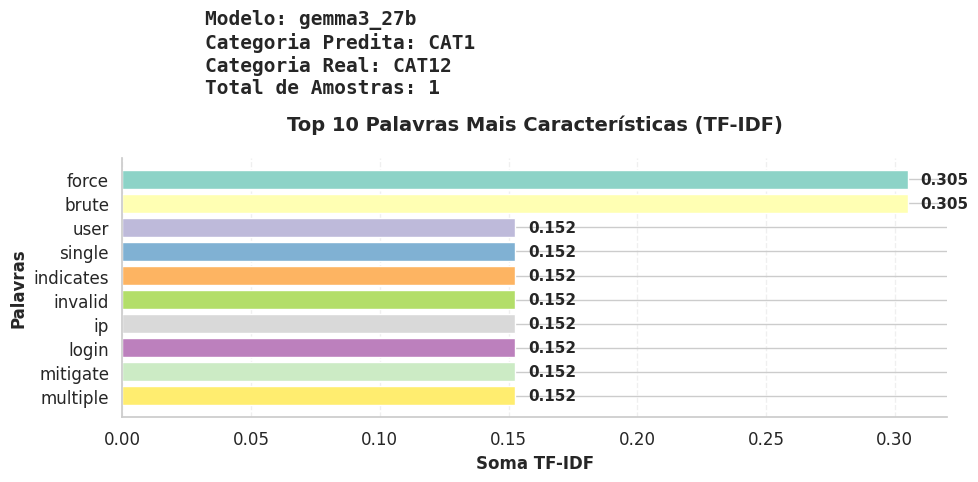


📊 Modelo: gemma3_27b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
force                0.3050
brute                0.3050
user                 0.1525
single               0.1525
indicates            0.1525
invalid              0.1525
ip                   0.1525
login                0.1525
mitigate             0.1525
multiple             0.1525



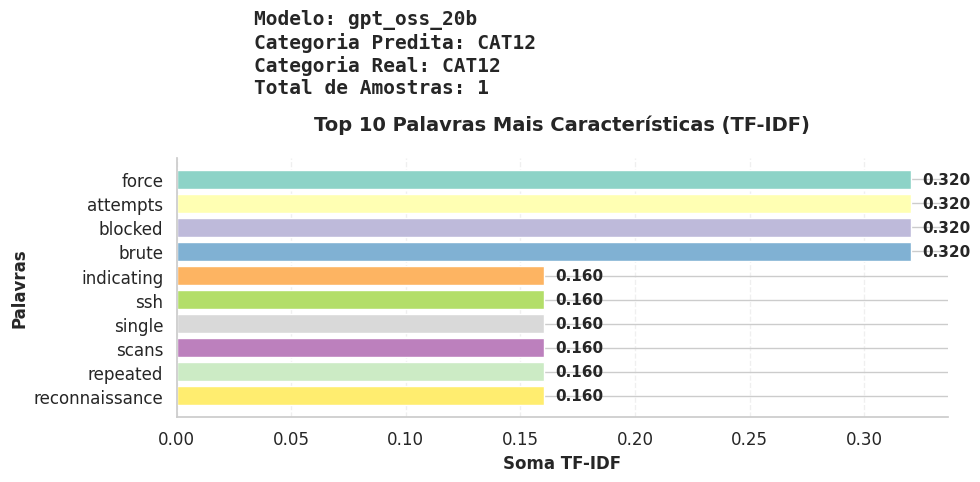


📊 Modelo: gpt_oss_20b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
force                0.3203
attempts             0.3203
blocked              0.3203
brute                0.3203
indicating           0.1601
ssh                  0.1601
single               0.1601
scans                0.1601
repeated             0.1601
reconnaissance       0.1601



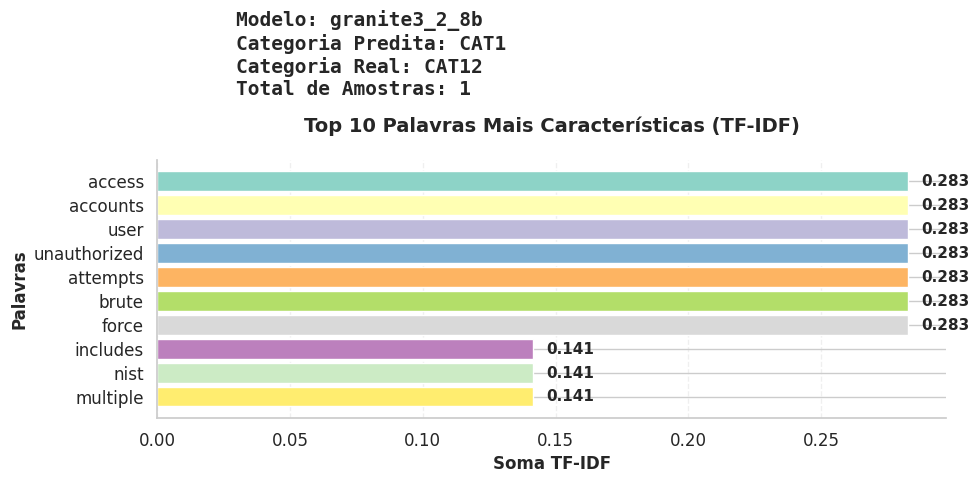


📊 Modelo: granite3_2_8b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
access               0.2828
accounts             0.2828
user                 0.2828
unauthorized         0.2828
attempts             0.2828
brute                0.2828
force                0.2828
includes             0.1414
nist                 0.1414
multiple             0.1414



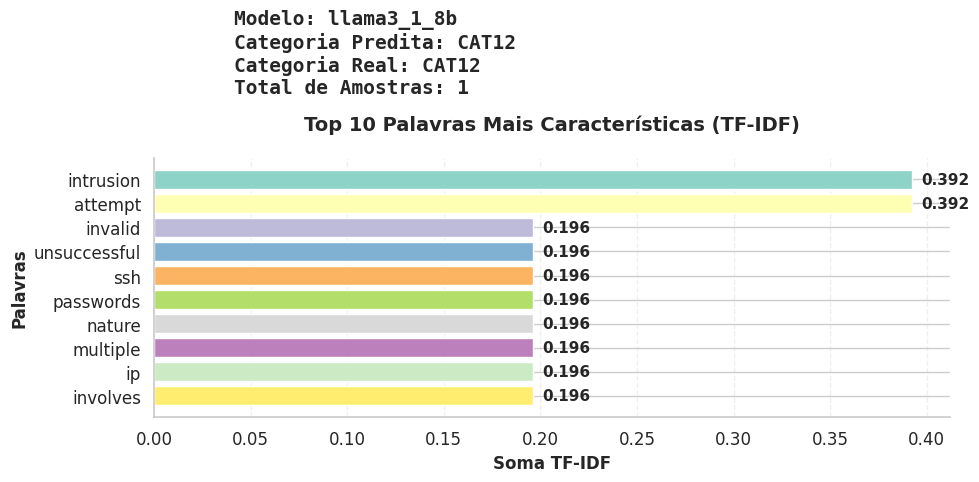


📊 Modelo: llama3_1_8b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
intrusion            0.3922
attempt              0.3922
invalid              0.1961
unsuccessful         0.1961
ssh                  0.1961
passwords            0.1961
nature               0.1961
multiple             0.1961
ip                   0.1961
involves             0.1961



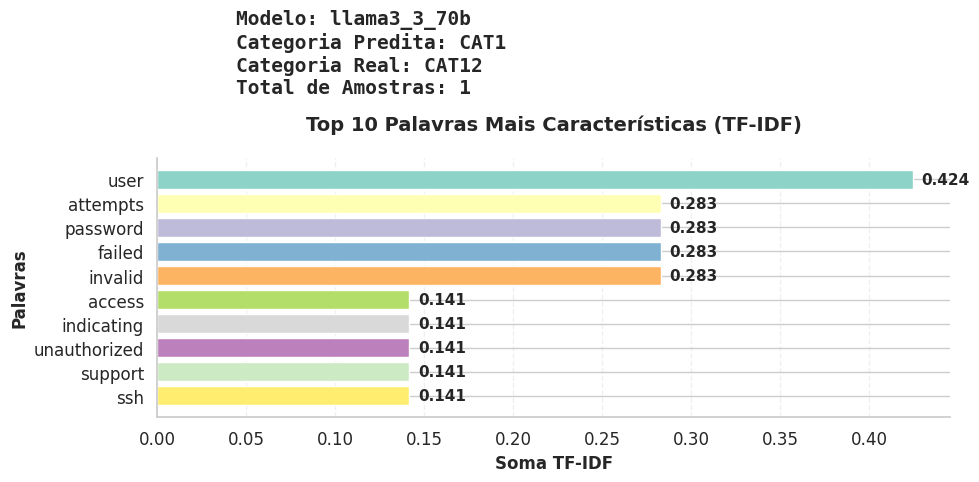


📊 Modelo: llama3_3_70b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
user                 0.4243
attempts             0.2828
password             0.2828
failed               0.2828
invalid              0.2828
access               0.1414
indicating           0.1414
unauthorized         0.1414
support              0.1414
ssh                  0.1414



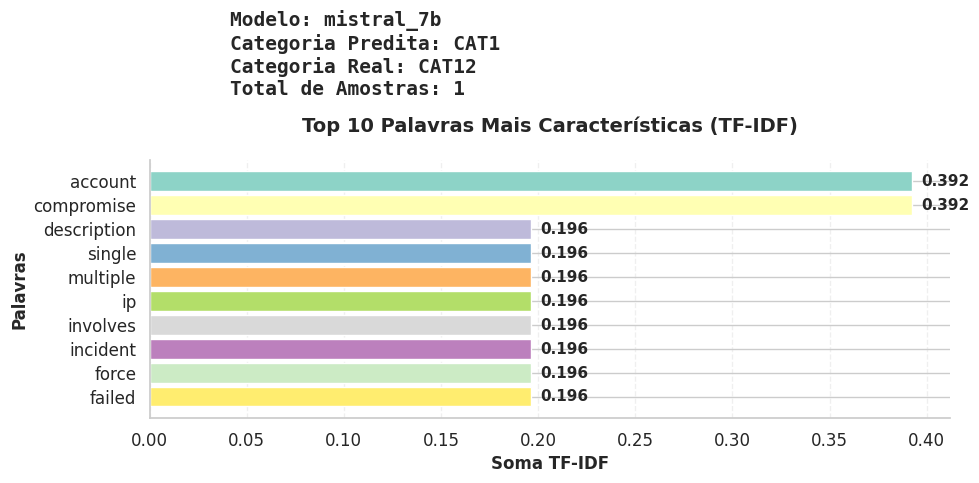


📊 Modelo: mistral_7b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
account              0.3922
compromise           0.3922
description          0.1961
single               0.1961
multiple             0.1961
ip                   0.1961
involves             0.1961
incident             0.1961
force                0.1961
failed               0.1961



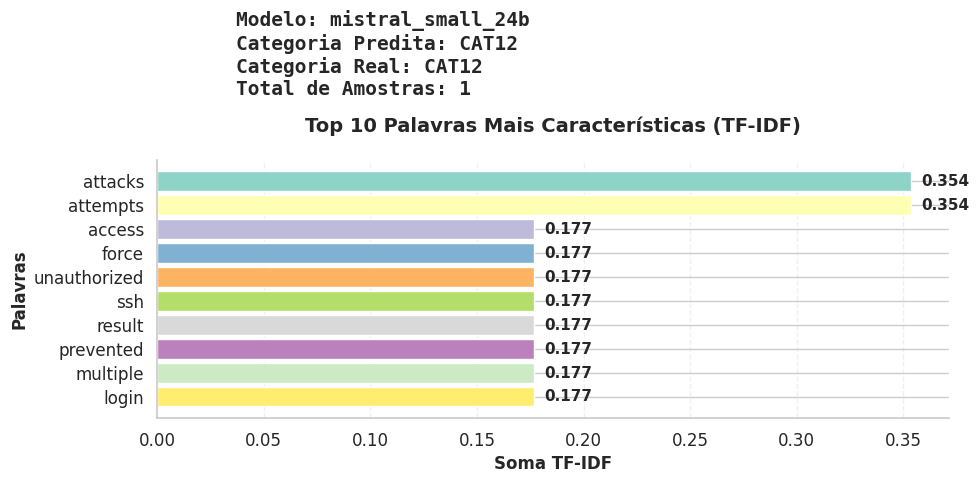


📊 Modelo: mistral_small_24b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attacks              0.3536
attempts             0.3536
access               0.1768
force                0.1768
unauthorized         0.1768
ssh                  0.1768
result               0.1768
prevented            0.1768
multiple             0.1768
login                0.1768



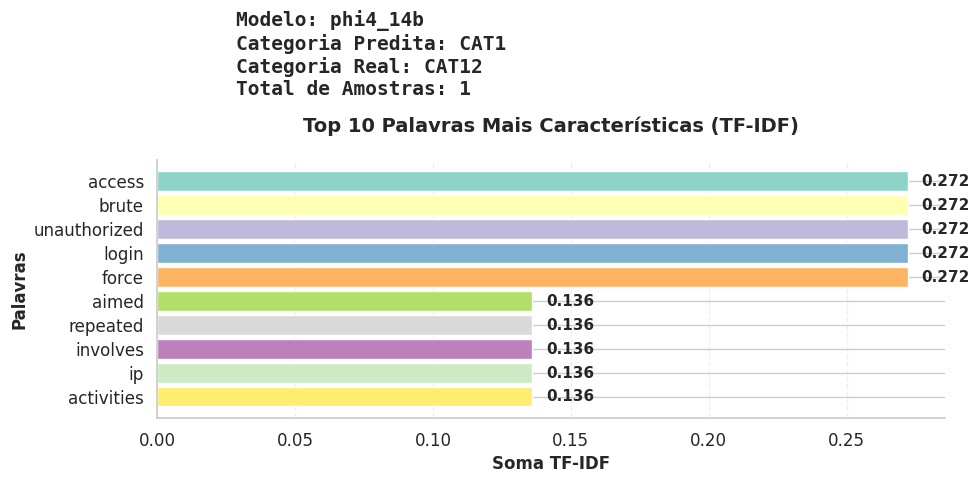


📊 Modelo: phi4_14b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
access               0.2722
brute                0.2722
unauthorized         0.2722
login                0.2722
force                0.2722
aimed                0.1361
repeated             0.1361
involves             0.1361
ip                   0.1361
activities           0.1361



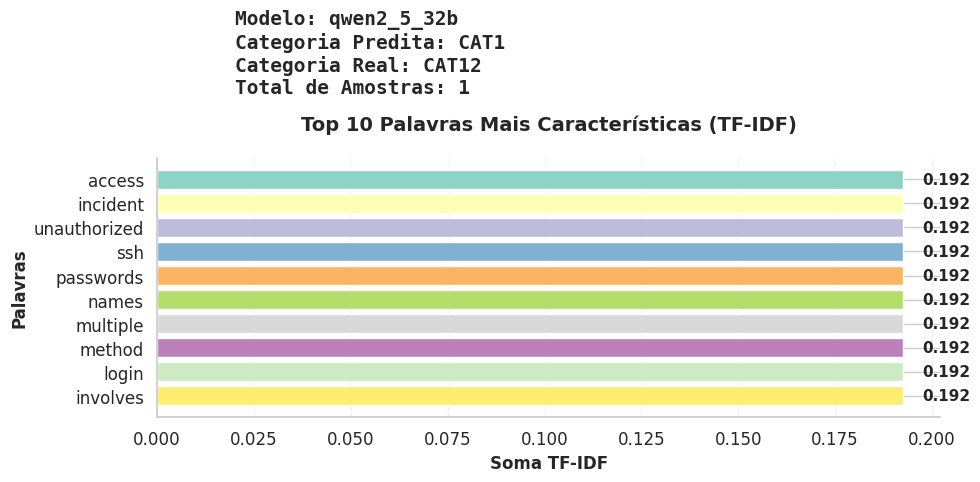


📊 Modelo: qwen2_5_32b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
access               0.1925
incident             0.1925
unauthorized         0.1925
ssh                  0.1925
passwords            0.1925
names                0.1925
multiple             0.1925
method               0.1925
login                0.1925
involves             0.1925



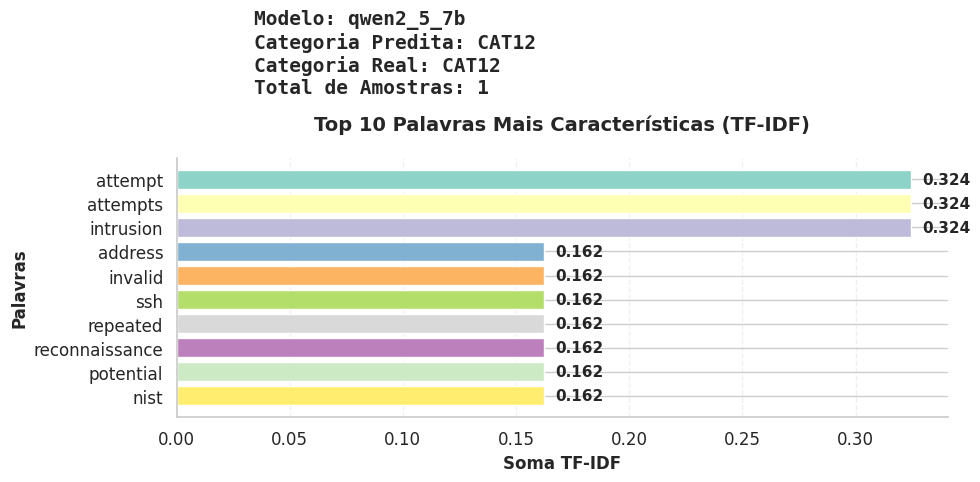


📊 Modelo: qwen2_5_7b
🎯 Categoria Predita: CAT12
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempt              0.3244
attempts             0.3244
intrusion            0.3244
address              0.1622
invalid              0.1622
ssh                  0.1622
repeated             0.1622
reconnaissance       0.1622
potential            0.1622
nist                 0.1622



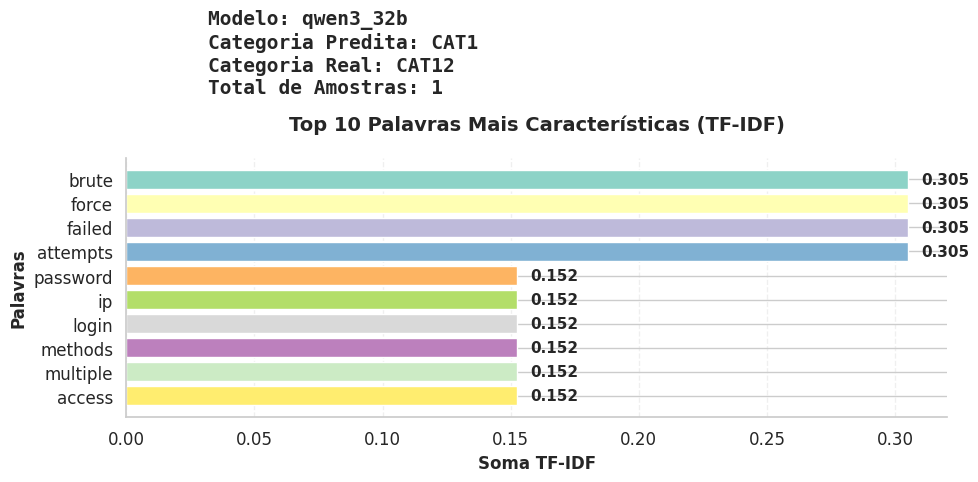


📊 Modelo: qwen3_32b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
brute                0.3050
force                0.3050
failed               0.3050
attempts             0.3050
password             0.1525
ip                   0.1525
login                0.1525
methods              0.1525
multiple             0.1525
access               0.1525



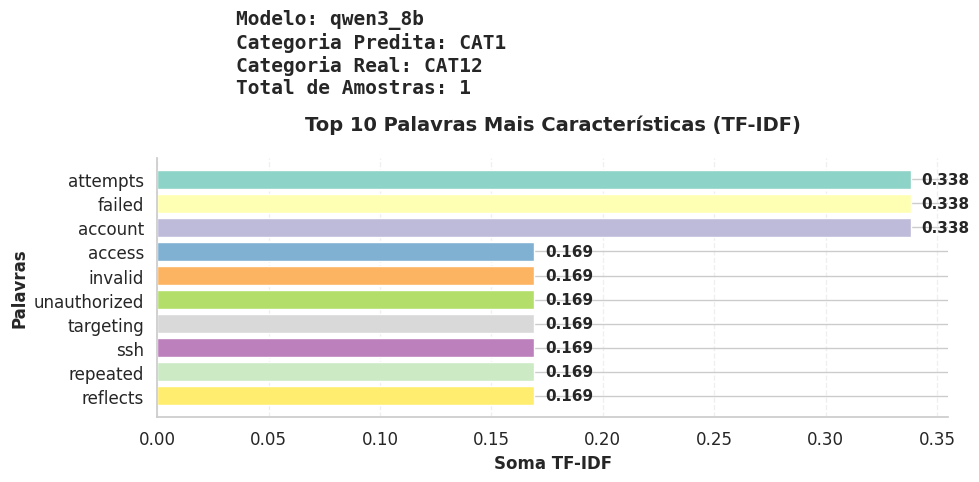


📊 Modelo: qwen3_8b
🎯 Categoria Predita: CAT1
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
attempts             0.3381
failed               0.3381
account              0.3381
access               0.1690
invalid              0.1690
unauthorized         0.1690
targeting            0.1690
ssh                  0.1690
repeated             0.1690
reflects             0.1690



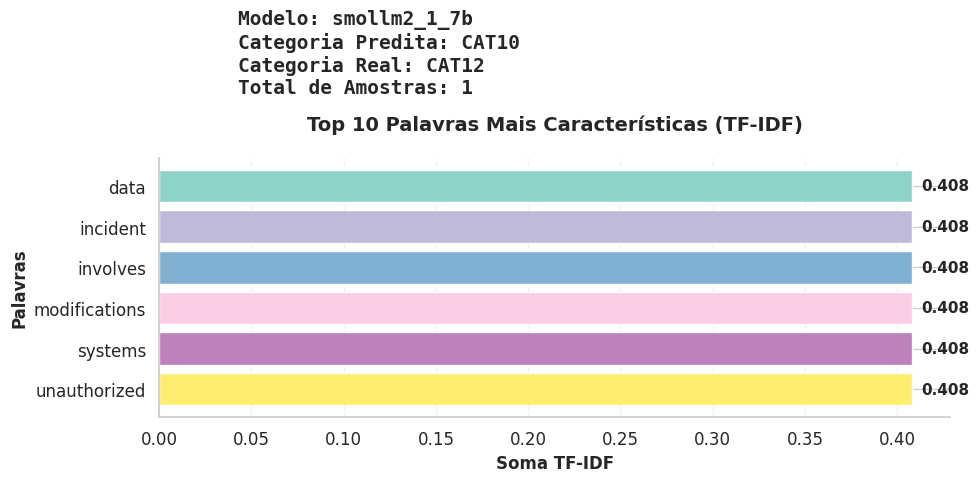


📊 Modelo: smollm2_1_7b
🎯 Categoria Predita: CAT10
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
data                 0.4082
incident             0.4082
involves             0.4082
modifications        0.4082
systems              0.4082
unauthorized         0.4082



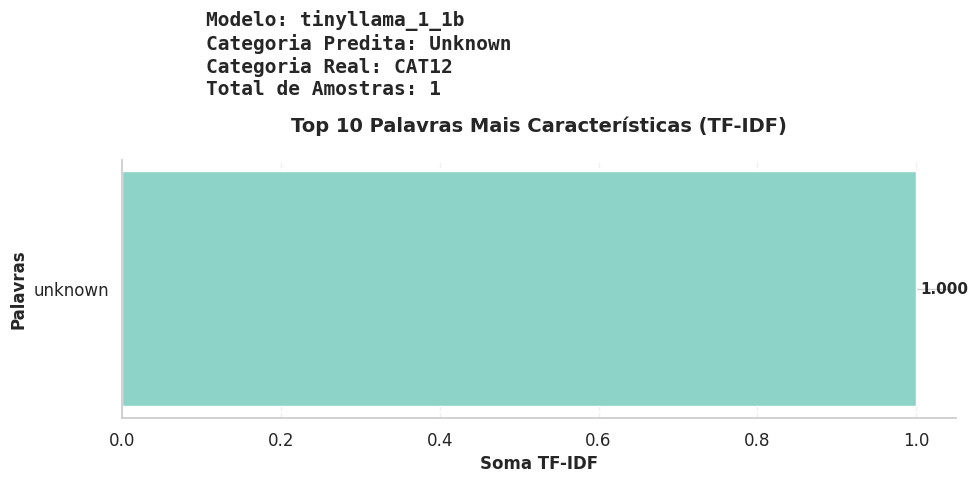


📊 Modelo: tinyllama_1_1b
🎯 Categoria Predita: Unknown
📝 Categoria Real: CAT12
📈 Total de Amostras: 1
Palavra             TF-IDF
----------------------------------------
unknown              1.0000



In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF por modelo
resultados_tfidf = {}

for modelo in df_parcial['modelo'].unique():
    textos_modelo = df_parcial[df_parcial['modelo'] == modelo]['explicacao_predita'].tolist()
    
    vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(textos_modelo)
    
    # Soma dos scores TF-IDF para cada palavra
    scores_tfidf = pd.DataFrame({
        'palavra': vectorizer.get_feature_names_out(),
        'tfidf_sum': tfidf_matrix.sum(axis=0).A1
    })
    
    # Ordenar por TF-IDF
    top_palavras = scores_tfidf.sort_values('tfidf_sum', ascending=False).head(10)
    resultados_tfidf[modelo] = top_palavras

# Gráfico individual para cada modelo
for modelo, df_palavras in resultados_tfidf.items():
    # Obter informações do modelo
    dados_modelo = df_parcial[df_parcial['modelo'] == modelo]
    
    categoria_predita = dados_modelo['categoria_predita'].mode()[0]
    categoria_real = dados_modelo['categoria'].mode()[0] if 'categoria' in dados_modelo.columns else "N/A"
    
    # Criar figura com subplots para informações adicionais
    fig = plt.figure(figsize=(10, 5))
    
    # Layout: 2x2 grid
    gs = plt.GridSpec(2, 2, height_ratios=[1, 4])
    
    # Área para informações do modelo
    ax_info = fig.add_subplot(gs[0, :])
    ax_info.axis('off')
    
    # Texto com informações
    info_text = f"""Modelo: {modelo}
Categoria Predita: {categoria_predita}
Categoria Real: {categoria_real}
Total de Amostras: {len(dados_modelo)}"""
    
    ax_info.text(0.1, 0.5, info_text, fontsize=14, fontweight='bold', 
                verticalalignment='center', fontfamily='monospace')
    
    # Gráfico principal
    ax_plot = fig.add_subplot(gs[1, :])
    
    # Criar gráfico de barras horizontais
    colors = plt.cm.Set3(np.linspace(0, 1, len(df_palavras)))
    bars = ax_plot.barh(df_palavras['palavra'], df_palavras['tfidf_sum'], color=colors)
    
    # Adicionar valores nas barras
    for i, (valor, palavra) in enumerate(zip(df_palavras['tfidf_sum'], df_palavras['palavra'])):
        ax_plot.text(valor + 0.005, i, f'{valor:.3f}', va='center', fontsize=11, fontweight='bold')
    
    # Configurações do gráfico
    ax_plot.set_xlabel('Soma TF-IDF', fontsize=12, fontweight='bold')
    ax_plot.set_ylabel('Palavras', fontsize=12, fontweight='bold')
    ax_plot.set_title('Top 10 Palavras Mais Características (TF-IDF)', 
                     fontsize=14, fontweight='bold', pad=20)
    
    # Grade
    ax_plot.grid(axis='x', alpha=0.3, linestyle='--')
    ax_plot.invert_yaxis()
    
    # Remover bordas
    for spine in ['top', 'right']:
        ax_plot.spines[spine].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Exibir resultados no console
    print(f"\n📊 Modelo: {modelo}")
    print(f"🎯 Categoria Predita: {categoria_predita}")
    print(f"📝 Categoria Real: {categoria_real}")
    print(f"📈 Total de Amostras: {len(dados_modelo)}")
    print("Palavra".ljust(20) + "TF-IDF")
    print("-" * 40)
    for _, row in df_palavras.iterrows():
        print(f"{row['palavra']:<20} {row['tfidf_sum']:.4f}")
    print("\n" + "="*60)

=== MÉTODO 1: TF-IDF GLOBAL ===


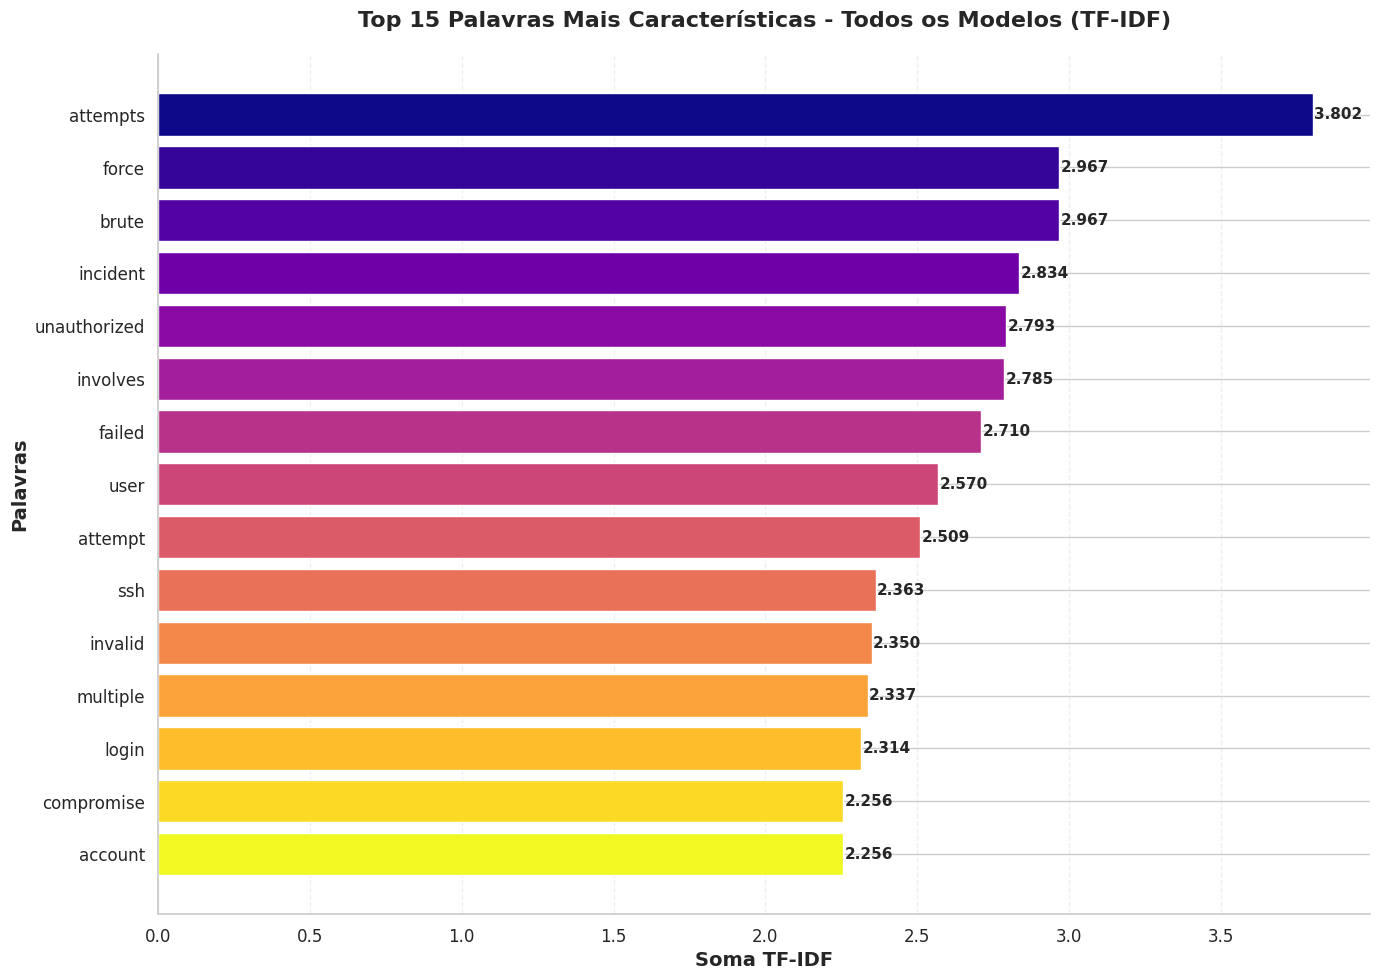


=== MÉTODO 2: CONTAGEM DE PALAVRAS ===


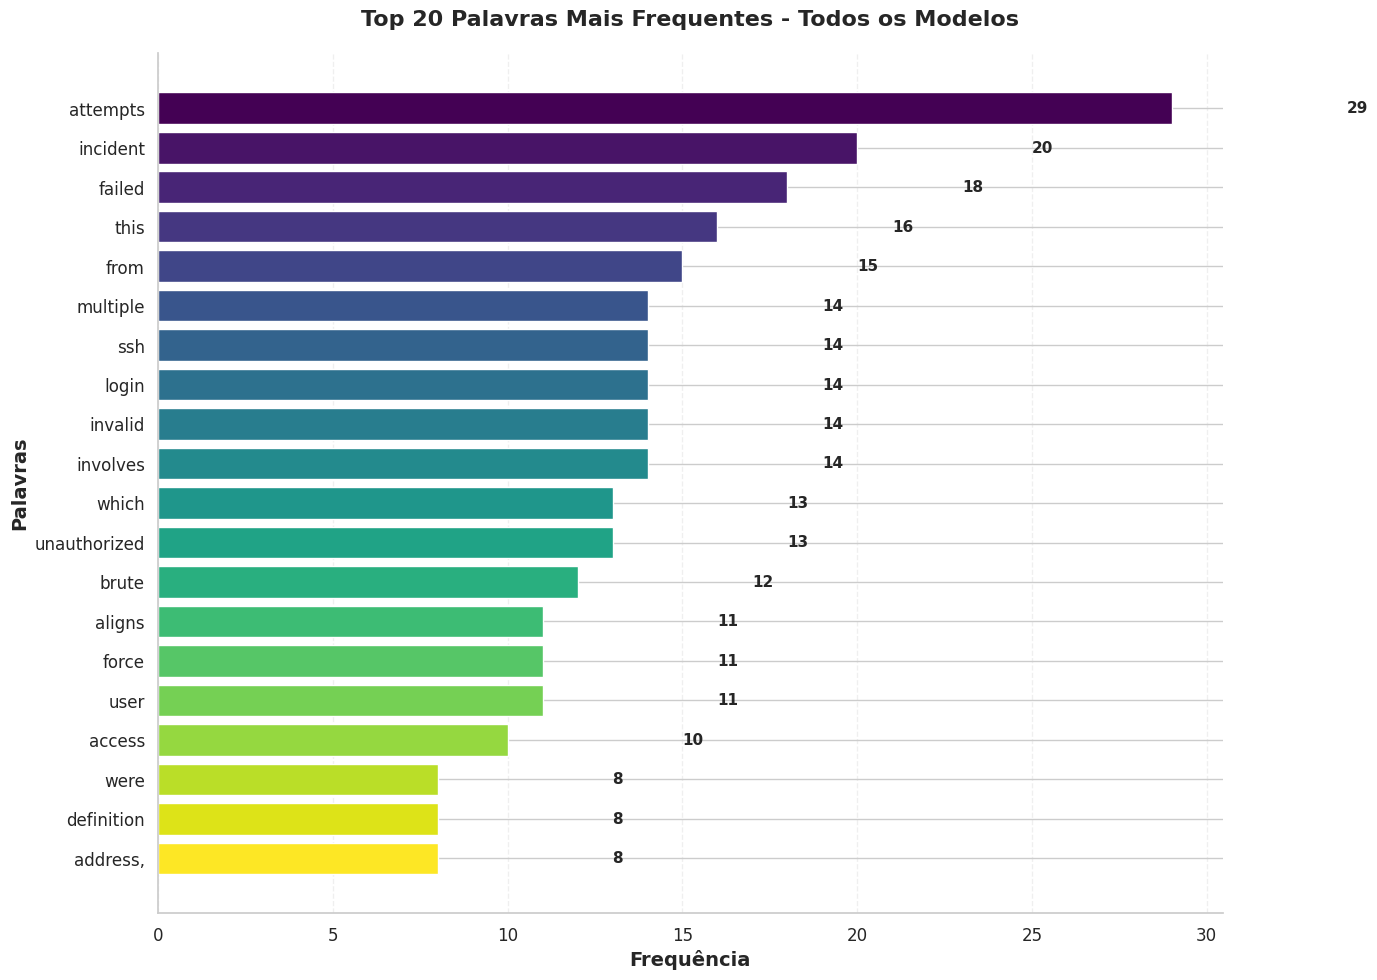


=== MÉTODO 3: COMPARAÇÃO ENTRE MODELOS ===

📊 ESTATÍSTICAS GERAIS - TODOS OS MODELOS
Total de explicações analisadas: 22
Total de modelos: 22
Total de palavras únicas: 257

📈 Top 10 palavras por TF-IDF (Global):
   1. attempts        3.8022
   2. force           2.9674
   3. brute           2.9674
   4. incident        2.8344
   5. unauthorized    2.7934
   6. involves        2.7851
   7. failed          2.7104
   8. user            2.5699
   9. attempt         2.5094
  10. ssh             2.3632

📊 Top 10 palavras por frequência:
   1. attempts        29 ocorrências
   2. incident        20 ocorrências
   3. failed          18 ocorrências
   4. this            16 ocorrências
   5. from            15 ocorrências
   6. multiple        14 ocorrências
   7. ssh             14 ocorrências
   8. login           14 ocorrências
   9. invalid         14 ocorrências
  10. involves        14 ocorrências

🎯 Distribuição por categoria predita:
  CAT1: 12 amostras (54.5%)
  CAT12: 7 amostras (31.8

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np

# Juntar todas as explicações preditas de todos os modelos
todas_explicacoes = df_parcial['explicacao_predita'].tolist()

# Método 1: Usando TF-IDF para todas as explicações
print("=== MÉTODO 1: TF-IDF GLOBAL ===")
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(todas_explicacoes)

# Soma dos scores TF-IDF para cada palavra
scores_tfidf_global = pd.DataFrame({
    'palavra': vectorizer.get_feature_names_out(),
    'tfidf_sum': tfidf_matrix.sum(axis=0).A1
})

# Ordenar por TF-IDF
top_palavras_global = scores_tfidf_global.sort_values('tfidf_sum', ascending=False).head(15)

# Gráfico TF-IDF Global
plt.figure(figsize=(14, 10))
colors_global = plt.cm.plasma(np.linspace(0, 1, len(top_palavras_global)))
bars_global = plt.barh(top_palavras_global['palavra'], top_palavras_global['tfidf_sum'], color=colors_global)

# Adicionar valores nas barras
for i, (valor, palavra) in enumerate(zip(top_palavras_global['tfidf_sum'], top_palavras_global['palavra'])):
    plt.text(valor + 0.005, i, f'{valor:.3f}', va='center', fontsize=11, fontweight='bold')

plt.xlabel('Soma TF-IDF', fontsize=14, fontweight='bold')
plt.ylabel('Palavras', fontsize=14, fontweight='bold')
plt.title('Top 15 Palavras Mais Características - Todos os Modelos (TF-IDF)', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Método 2: Contagem simples de palavras
print("\n=== MÉTODO 2: CONTAGEM DE PALAVRAS ===")
def get_top_words_global(textos, n=20):
    """Extrai as n palavras mais comuns de todas as explicações"""
    todas_palavras = ' '.join(textos).lower().split()
    # Filtrar palavras (remover stop words básicas e palavras muito curtas)
    stop_words_basicas = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'}
    palavras_filtradas = [palavra for palavra in todas_palavras 
                         if len(palavra) > 2 and palavra not in stop_words_basicas]
    return Counter(palavras_filtradas).most_common(n)

top_palavras_contagem = get_top_words_global(todas_explicacoes)

# Gráfico de contagem de palavras
plt.figure(figsize=(14, 10))
palavras_cont, frequencias_cont = zip(*top_palavras_contagem)

colors_cont = plt.cm.viridis(np.linspace(0, 1, len(palavras_cont)))
bars_cont = plt.barh(palavras_cont, frequencias_cont, color=colors_cont)

# Adicionar valores nas barras
for i, (palavra, freq) in enumerate(zip(palavras_cont, frequencias_cont)):
    plt.text(freq + 5, i, f'{freq}', va='center', fontsize=11, fontweight='bold')

plt.xlabel('Frequência', fontsize=14, fontweight='bold')
plt.ylabel('Palavras', fontsize=14, fontweight='bold')
plt.title('Top 20 Palavras Mais Frequentes - Todos os Modelos', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Método 3: Comparação entre modelos (palavras mais características por modelo)
print("\n=== MÉTODO 3: COMPARAÇÃO ENTRE MODELOS ===")
# Criar um DataFrame com as top palavras de cada modelo
comparacao_modelos = []

for modelo in df_parcial['modelo'].unique():
    textos_modelo = df_parcial[df_parcial['modelo'] == modelo]['explicacao_predita'].tolist()
    
    vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(textos_modelo)
    
    scores_tfidf = pd.DataFrame({
        'palavra': vectorizer.get_feature_names_out(),
        'tfidf_sum': tfidf_matrix.sum(axis=0).A1,
        'modelo': modelo
    })
    
    top_5_modelo = scores_tfidf.nlargest(5, 'tfidf_sum')
    comparacao_modelos.append(top_5_modelo)

df_comparacao = pd.concat(comparacao_modelos, ignore_index=True)

# Estatísticas gerais
print("\n" + "="*60)
print("📊 ESTATÍSTICAS GERAIS - TODOS OS MODELOS")
print("="*60)

total_explicacoes = len(df_parcial)
total_modelos = len(df_parcial['modelo'].unique())
total_palavras_unicas = len(set(' '.join(todas_explicacoes).lower().split()))

print(f"Total de explicações analisadas: {total_explicacoes}")
print(f"Total de modelos: {total_modelos}")
print(f"Total de palavras únicas: {total_palavras_unicas}")

print(f"\n📈 Top 10 palavras por TF-IDF (Global):")
for i, (_, row) in enumerate(top_palavras_global.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['palavra']:<15} {row['tfidf_sum']:.4f}")

print(f"\n📊 Top 10 palavras por frequência:")
for i, (palavra, freq) in enumerate(top_palavras_contagem[:10], 1):
    print(f"  {i:2d}. {palavra:<15} {freq} ocorrências")

# Distribuição por categoria predita (se disponível)
if 'categoria_predita' in df_parcial.columns:
    print(f"\n🎯 Distribuição por categoria predita:")
    dist_categoria = df_parcial['categoria_predita'].value_counts()
    for cat, count in dist_categoria.items():
        print(f"  {cat}: {count} amostras ({count/total_explicacoes*100:.1f}%)")


=== MÉTODO 3: COMPARAÇÃO ENTRE MODELOS ===


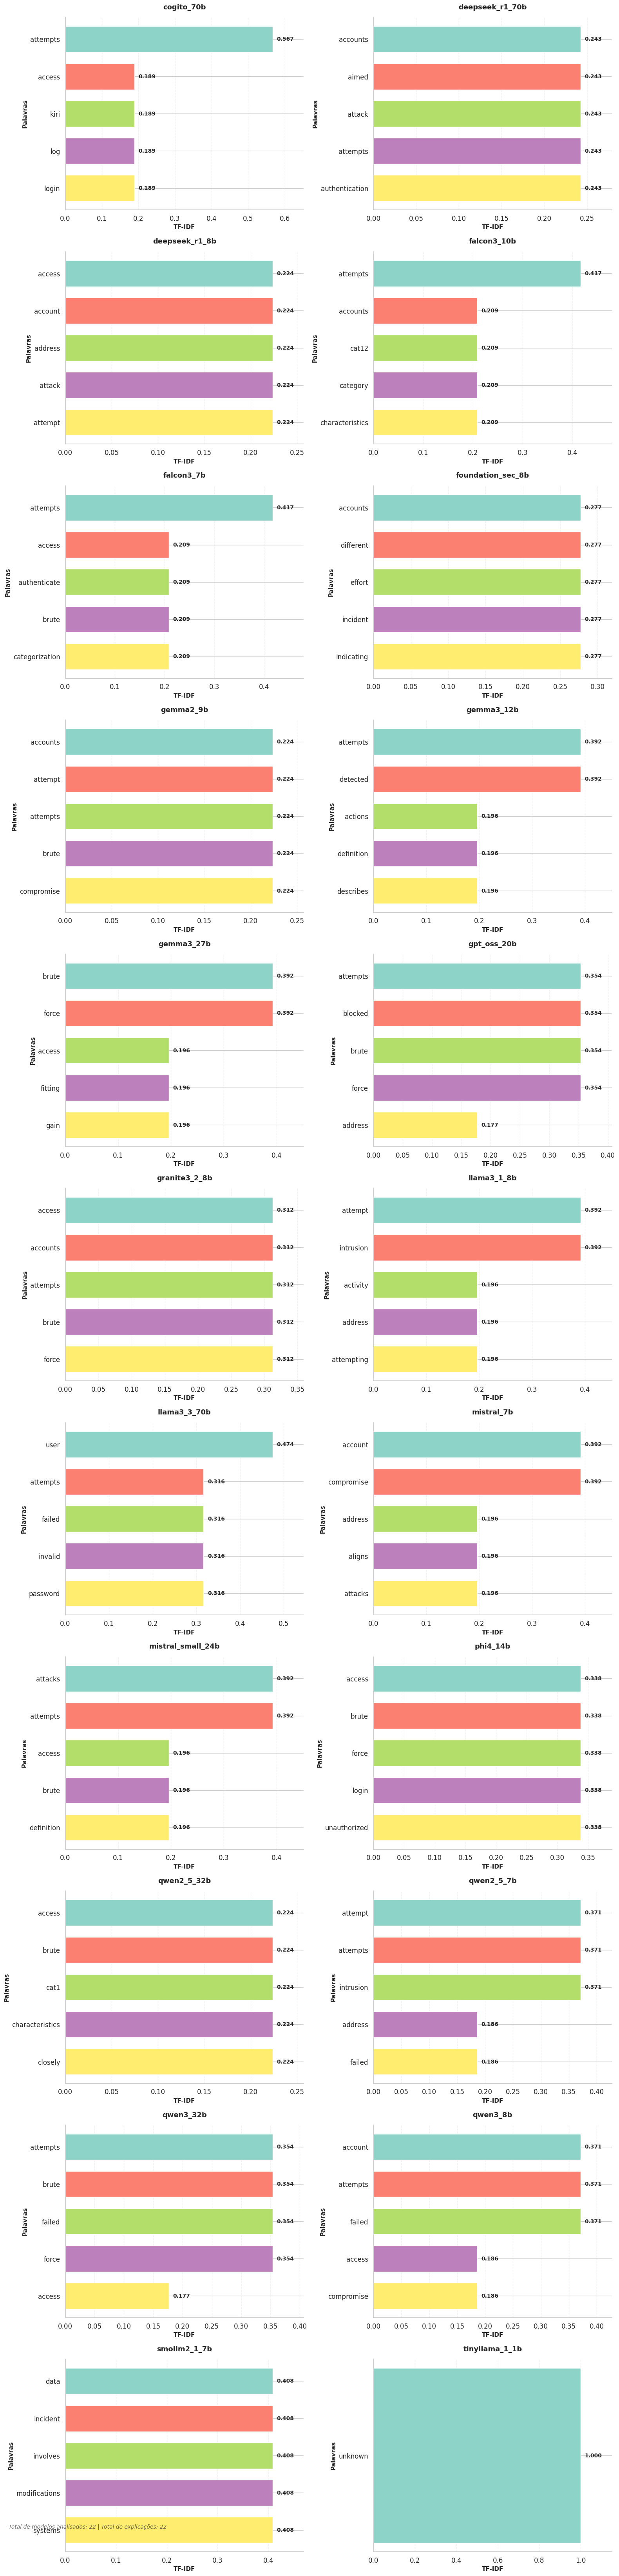


📊 ESTATÍSTICAS POR MODELO:

🔹 cogito_70b (n=1):
   1. attempts        TF-IDF: 0.5669
   2. access          TF-IDF: 0.1890
   3. kiri            TF-IDF: 0.1890

🔹 deepseek_r1_70b (n=1):
   1. accounts        TF-IDF: 0.2425
   2. aimed           TF-IDF: 0.2425
   3. attack          TF-IDF: 0.2425

🔹 deepseek_r1_8b (n=1):
   1. access          TF-IDF: 0.2236
   2. account         TF-IDF: 0.2236
   3. address         TF-IDF: 0.2236

🔹 falcon3_10b (n=1):
   1. attempts        TF-IDF: 0.4170
   2. accounts        TF-IDF: 0.2085
   3. cat12           TF-IDF: 0.2085

🔹 falcon3_7b (n=1):
   1. attempts        TF-IDF: 0.4170
   2. access          TF-IDF: 0.2085
   3. authenticate    TF-IDF: 0.2085

🔹 foundation_sec_8b (n=1):
   1. accounts        TF-IDF: 0.2774
   2. different       TF-IDF: 0.2774
   3. effort          TF-IDF: 0.2774

🔹 gemma2_9b (n=1):
   1. accounts        TF-IDF: 0.2236
   2. attempt         TF-IDF: 0.2236
   3. attempts        TF-IDF: 0.2236

🔹 gemma3_12b (n=1):
   1. attem

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

print("\n=== MÉTODO 3: COMPARAÇÃO ENTRE MODELOS ===")

# Criar um DataFrame com as top palavras de cada modelo
comparacao_modelos = []

for modelo in df_parcial['modelo'].unique():
    textos_modelo = df_parcial[df_parcial['modelo'] == modelo]['explicacao_predita'].tolist()
    
    vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(textos_modelo)
    
    scores_tfidf = pd.DataFrame({
        'palavra': vectorizer.get_feature_names_out(),
        'tfidf_sum': tfidf_matrix.sum(axis=0).A1,
        'modelo': modelo
    })
    
    top_5_modelo = scores_tfidf.nlargest(5, 'tfidf_sum')
    comparacao_modelos.append(top_5_modelo)

df_comparacao = pd.concat(comparacao_modelos, ignore_index=True)

# Configurações do gráfico
modelos_unicos = df_parcial['modelo'].unique()
n_modelos = len(modelos_unicos)

# Calcular layout ideal
n_cols = 2
n_rows = (n_modelos + n_cols - 1) // n_cols  # Arredondamento para cima

# Criar figura com tamanho dinâmico baseado no número de modelos
fig_width = 16
fig_height = 6 * n_rows  # Altura proporcional ao número de linhas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axes = axes.flatten() if n_modelos > 1 else [axes]

# Ajustar espaçamentos
plt.subplots_adjust(
    left=0.08,      # Margem esquerda
    right=0.95,     # Margem direita  
    bottom=0.08,    # Margem inferior
    top=0.92,       # Margem superior
    wspace=0.3,     # Espaço horizontal entre subplots
    hspace=0.4      # Espaço vertical entre subplots
)

# Plotar cada modelo
for idx, modelo in enumerate(modelos_unicos):
    ax = axes[idx]
    dados_modelo = df_comparacao[df_comparacao['modelo'] == modelo].head(5)
    
    # Verificar se há dados para o modelo
    if len(dados_modelo) == 0:
        ax.text(0.5, 0.5, f'Sem dados\npara {modelo}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'{modelo}', fontweight='bold', pad=10)
        continue
    
    # Cores
    colors = plt.cm.Set3(np.linspace(0, 1, len(dados_modelo)))
    
    # Gráfico de barras horizontais
    bars = ax.barh(dados_modelo['palavra'], dados_modelo['tfidf_sum'], color=colors, height=0.7)
    
    # Adicionar valores nas barras
    max_tfidf = dados_modelo['tfidf_sum'].max()
    for i, (_, row) in enumerate(dados_modelo.iterrows()):
        text_offset = max_tfidf * 0.02  # Offset proporcional ao valor máximo
        ax.text(row['tfidf_sum'] + text_offset, i, f'{row["tfidf_sum"]:.3f}', 
                va='center', fontsize=10, fontweight='bold')
    
    # Configurações do eixo
    ax.set_xlabel('TF-IDF', fontsize=11, fontweight='bold')
    ax.set_ylabel('Palavras', fontsize=11, fontweight='bold')
    ax.set_title(f'{modelo}', fontsize=13, fontweight='bold', pad=15)
    
    # Grid e estilo
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.invert_yaxis()
    
    # Remover bordas
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Ajustar limites do eixo X para dar espaço aos textos
    x_max = dados_modelo['tfidf_sum'].max() * 1.15
    ax.set_xlim(0, x_max)

# Ocultar subplots vazios
for idx in range(len(modelos_unicos), len(axes)):
    axes[idx].set_visible(False)

# Título principal
#plt.suptitle('Top 5 Palavras Mais Características por Modelo (TF-IDF)', 
#             fontsize=16, fontweight='bold', y=0.98)

# Adicionar legenda informativa
fig.text(0.02, 0.02, f'Total de modelos analisados: {n_modelos} | '
                     f'Total de explicações: {len(df_parcial)}',
         fontsize=10, style='italic', alpha=0.7)

plt.tight_layout()
plt.show()

# Estatísticas por modelo no console
print(f"\n📊 ESTATÍSTICAS POR MODELO:")
print("="*50)
for modelo in modelos_unicos:
    dados_modelo = df_comparacao[df_comparacao['modelo'] == modelo].head(3)
    total_amostras = len(df_parcial[df_parcial['modelo'] == modelo])
    
    print(f"\n🔹 {modelo} (n={total_amostras}):")
    for i, (_, row) in enumerate(dados_modelo.iterrows(), 1):
        print(f"   {i}. {row['palavra']:<15} TF-IDF: {row['tfidf_sum']:.4f}")

In [ ]:
You are a cybersecurity expert.

Your task:
Classify the following incident description into one of the predefined NIST categories (CAT1–CAT12),
and provide a concise justification for your choice.

### **Critical Differentiation Rules (Based on Observed Model Errors)**

* **CAT1 vs. CAT12 (Account/Intrusion Attempt):** Classify brute force/login attacks as **CAT1** only if there is evidence of **SUCCESS** (unauthorized access, compromised login). Classify as **CAT12** if the evidence points to **FAILURE** (invalid logins, authentication failures, blocked attempts).
* **CAT3 vs. Other Categories (DoS/DDoS):** The incident must primarily focus on **UNAVAILABILITY** or **IMPACT on System Access** due to traffic/load (e.g., volumetric attack) to be classified as CAT3. Attacks that only *generate traffic* but aim for *exploitation* (e.g., a scan) should be prioritized in CAT12 or CAT5.
* **CAT9 (Modification):** This category should be strictly reserved for **UNAUTHORIZED CHANGES** to systems, data, or configuration (e.g., website defacement, malicious firewall change). Do not confuse it with exploitation (CAT5) or data leaks (CAT4).

### NIST Categories for Classification

| Code | Category | Description | Search Terms |
|:---:|:---:|:---:|:---:|
| **CAT1** | **Account Compromise** | **SUCCESS REQUIRED:** Successful and unauthorized access to user or administrator accounts. | ["phishing", "brute force **SUCCESS**", "**SUCCESSFUL** login", "unauthorized access **GRANTED**", "compromised password", "credential theft", "account compromise", "token", "oauth", "ssh **ACCESS**"] |
| **CAT2** | **Malware** | Infection by malicious code that compromises devices or data. | ["malware", "ransomware", "trojan", "virus", "spyware", "rootkit", "infection", "malicious code"] |
| **CAT3** | **Denial of Service Attack (DoS/DDoS)** | Making systems or networks unavailable. **Focus on UNAVAILABILITY.** | ["ddos", "dos", "denial of service", "flood", "syn flood", "udp flood", "botnet", "api outage", "site down", "volumetric attack"] |
| **CAT4** | **Data Leak/Exfiltration** | Unauthorized access, copy, or disclosure of sensitive data. | ["data leak", "exposed data", "leaked credentials", "sensitive information", "data exfiltration", "unauthorized disclosure", "database theft"] |
| **CAT5** | **Vulnerability Exploitation** | Using known or unknown flaws to compromise assets. | ["exploit", "vulnerability", "cve", "remote execution", "sql injection", "injection", "rce", "security flaw", "insecure service"] |
| **CAT6** | **Insider Abuse** | Intentional or negligent actions by internal users/employees. | ["insider", "internal abuse", "employee", "internal leak", "sabotage", "intentional action", "staff", "misuse of privilege"] |
| **CAT7** | **Social Engineering** | Deception of people to gain access or information (non-technical vector). | ["social engineering", "phishing", "vishing", "fraud", "deception", "spoofing", "manipulation", "scam", "ceo fraud"] |
| **CAT8** | **Physical Incident/Infrastructure** | Physical violation impacting computational assets. | ["physical access", "equipment theft", "burglary", "unauthorized entry", "broken door", "physical breach", "datacenter break-in"] |
| **CAT9** | **Unauthorized Modification** | Unauthorized modification to systems, data, or configurations (e.g., web defacement). | ["modification", "defacement", "unauthorized change", "erased", "altered record", "tampering", "malicious configuration change"] |
| **CAT10** | **Misuse of Resources** | Unauthorized use of systems for other purposes (not primary goal of organization). | ["misuse", "resource abuse", "crypto mining", "compromised server", "malware hosting", "unauthorized use", "spamming"] |
| **CAT11** | **Third-Party/Vendor Issue** | Incident originating from a third-party security failure (e.g., cloud provider, SaaS). | ["third party", "supplier", "partner", "vendor", "supply chain", "external breach", "saas issue", "cloud breach"] |
| **CAT12** | **Intrusion Attempt** | **FAILURE OR UNCONFIRMED:** Hostile attempts at intrusion **NOT confirmed as successful** or which were prevented/blocked. | ["intrusion attempt", "scan", "reconnaissance", "probing", "port scan", "blocked exploit", "**FAILED** attempt", "**INVALID** login", "**AUTHENTICATION FAILURE**", "brute force **ATTEMPT**"] |

---

### Input:
Incident Description:
{incident}

---

### Output format:
Category: [CAT number, e.g., CAT5]  
Explanation: [Concise justification linking the description to the chosen category, referring to the **SUCCESS/FAILURE** evidence when necessary]

If classification is not possible, return:
Category: Unknown  
Explanation: Unknown


In [ ]:
def _build_zeroshot_prompt(self, incident: str) -> str:
    """Constrói o prompt zero-shot completo."""
    
    prompt = f"""You are a cybersecurity expert.

Your task:
Classify the following incident description into one of the predefined NIST categories (CAT1–CAT12),
and provide a concise justification for your choice.

### **Critical Differentiation Rules (Based on Observed Model Errors)**

* **CAT1 vs. CAT12 (Account/Intrusion Attempt):** Classify brute force/login attacks as **CAT1** only if there is evidence of **SUCCESS** (unauthorized access, compromised login). Classify as **CAT12** if the evidence points to **FAILURE** (invalid logins, authentication failures, blocked attempts).
* **CAT3 vs. Other Categories (DoS/DDoS):** The incident must primarily focus on **UNAVAILABILITY** or **IMPACT on System Access** due to traffic/load (e.g., volumetric attack) to be classified as CAT3. Attacks that only *generate traffic* but aim for *exploitation* (e.g., a scan) should be prioritized in CAT12 or CAT5.
* **CAT9 (Modification):** This category should be strictly reserved for **UNAUTHORIZED CHANGES** to systems, data, or configuration (e.g., website defacement, malicious firewall change). Do not confuse it with exploitation (CAT5) or data leaks (CAT4).

### NIST Categories for Classification

**CAT1: Account Compromise** - **SUCCESS REQUIRED:** Successful and unauthorized access to user or administrator accounts.
Search Terms: ["phishing", "brute force SUCCESS", "SUCCESSFUL login", "unauthorized access GRANTED", "compromised password", "credential theft", "account compromise", "token", "oauth", "ssh ACCESS"]

**CAT2: Malware** - Infection by malicious code that compromises devices or data.
Search Terms: ["malware", "ransomware", "trojan", "virus", "spyware", "rootkit", "infection", "malicious code"]

**CAT3: Denial of Service Attack (DoS/DDoS)** - Making systems or networks unavailable. **Focus on UNAVAILABILITY.**
Search Terms: ["ddos", "dos", "denial of service", "flood", "syn flood", "udp flood", "botnet", "api outage", "site down", "volumetric attack"]

**CAT4: Data Leak/Exfiltration** - Unauthorized access, copy, or disclosure of sensitive data.
Search Terms: ["data leak", "exposed data", "leaked credentials", "sensitive information", "data exfiltration", "unauthorized disclosure", "database theft"]

**CAT5: Vulnerability Exploitation** - Using known or unknown flaws to compromise assets.
Search Terms: ["exploit", "vulnerability", "cve", "remote execution", "sql injection", "injection", "rce", "security flaw", "insecure service"]

**CAT6: Insider Abuse** - Intentional or negligent actions by internal users/employees.
Search Terms: ["insider", "internal abuse", "employee", "internal leak", "sabotage", "intentional action", "staff", "misuse of privilege"]

**CAT7: Social Engineering** - Deception of people to gain access or information (non-technical vector).
Search Terms: ["social engineering", "phishing", "vishing", "fraud", "deception", "spoofing", "manipulation", "scam", "ceo fraud"]

**CAT8: Physical Incident/Infrastructure** - Physical violation impacting computational assets.
Search Terms: ["physical access", "equipment theft", "burglary", "unauthorized entry", "broken door", "physical breach", "datacenter break-in"]

**CAT9: Unauthorized Modification** - Unauthorized modification to systems, data, or configurations (e.g., web defacement).
Search Terms: ["modification", "defacement", "unauthorized change", "erased", "altered record", "tampering", "malicious configuration change"]

**CAT10: Misuse of Resources** - Unauthorized use of systems for other purposes (not primary goal of organization).
Search Terms: ["misuse", "resource abuse", "crypto mining", "compromised server", "malware hosting", "unauthorized use", "spamming"]

**CAT11: Third-Party/Vendor Issue** - Incident originating from a third-party security failure (e.g., cloud provider, SaaS).
Search Terms: ["third party", "supplier", "partner", "vendor", "supply chain", "external breach", "saas issue", "cloud breach"]

**CAT12: Intrusion Attempt** - **FAILURE OR UNCONFIRMED:** Hostile attempts at intrusion **NOT confirmed as successful** or which were prevented/blocked.
Search Terms: ["intrusion attempt", "scan", "reconnaissance", "probing", "port scan", "blocked exploit", "FAILED attempt", "INVALID login", "AUTHENTICATION FAILURE", "brute force ATTEMPT"]

---

### Input:
Incident Description:
{incident}

---

### Output format:
Category: [CAT number, e.g., CAT5]  
Explanation: [Concise justification linking the description to the chosen category, referring to the **SUCCESS/FAILURE** evidence when necessary]

If classification is not possible, return:
Category: Unknown  
Explanation: Unknown
"""
    
    return prompt.strip()